# PA 2: Breast and Ovary Cancer Clustering

Mario Moreno 

The data downloads are on the R script in this directory: GDCRead.R. The files themselves have been deleted to save space in the submission and in my machine's memory. 

In [1]:
import pandas as pd
import clusters as cl
import importlib
importlib.reload(cl)
import warnings; warnings.simplefilter('ignore')

In [2]:
breast = pd.read_csv('breast_exp.csv')
ovary = pd.read_csv('ovary_exp.csv')
breast = breast.drop(breast.columns[0], axis=1)
ovary = ovary.drop(ovary.columns[0], axis = 1)

#### Q1) Preparing the data for clustering 

In order to prepare the data, given that I've read in the HT-Seq counts data, I need to standardize it in order to be effectively run clustering algorithms. This is because cluster analysis depends on the concept of measuring the distance between the different observations we're trying to cluster. If different observations are measured on different scales, this makes our clustering analysis moot. There are a number of ways of standardizing data for clustering, including:
* Z-Score: a common way of standardizing data in which you subtract the mean of the column from the observation and divide by the standard deviation of the column. It might be too severe in that it makes outliers appear closer to the data than usual.
* Max-Min: another common way of standardizing data in which features are scaled to lie within a given minimum and maximum value, often [0, 1]
* Robust scaling: a less commonly used way of standardizing data which is effective in the case of data with many outliers, in which mean and SD might not mean as much
* Scaling to a Gaussian: another way of standardizing your data so that it closely approximates a guassian distribution. 

These are all functions in sklearn, so I'll try to implement them all and test across algorithms. First, however, I want to get a sense of my what the histograms look like for random subsets of my dataframes (random because they're so large). 

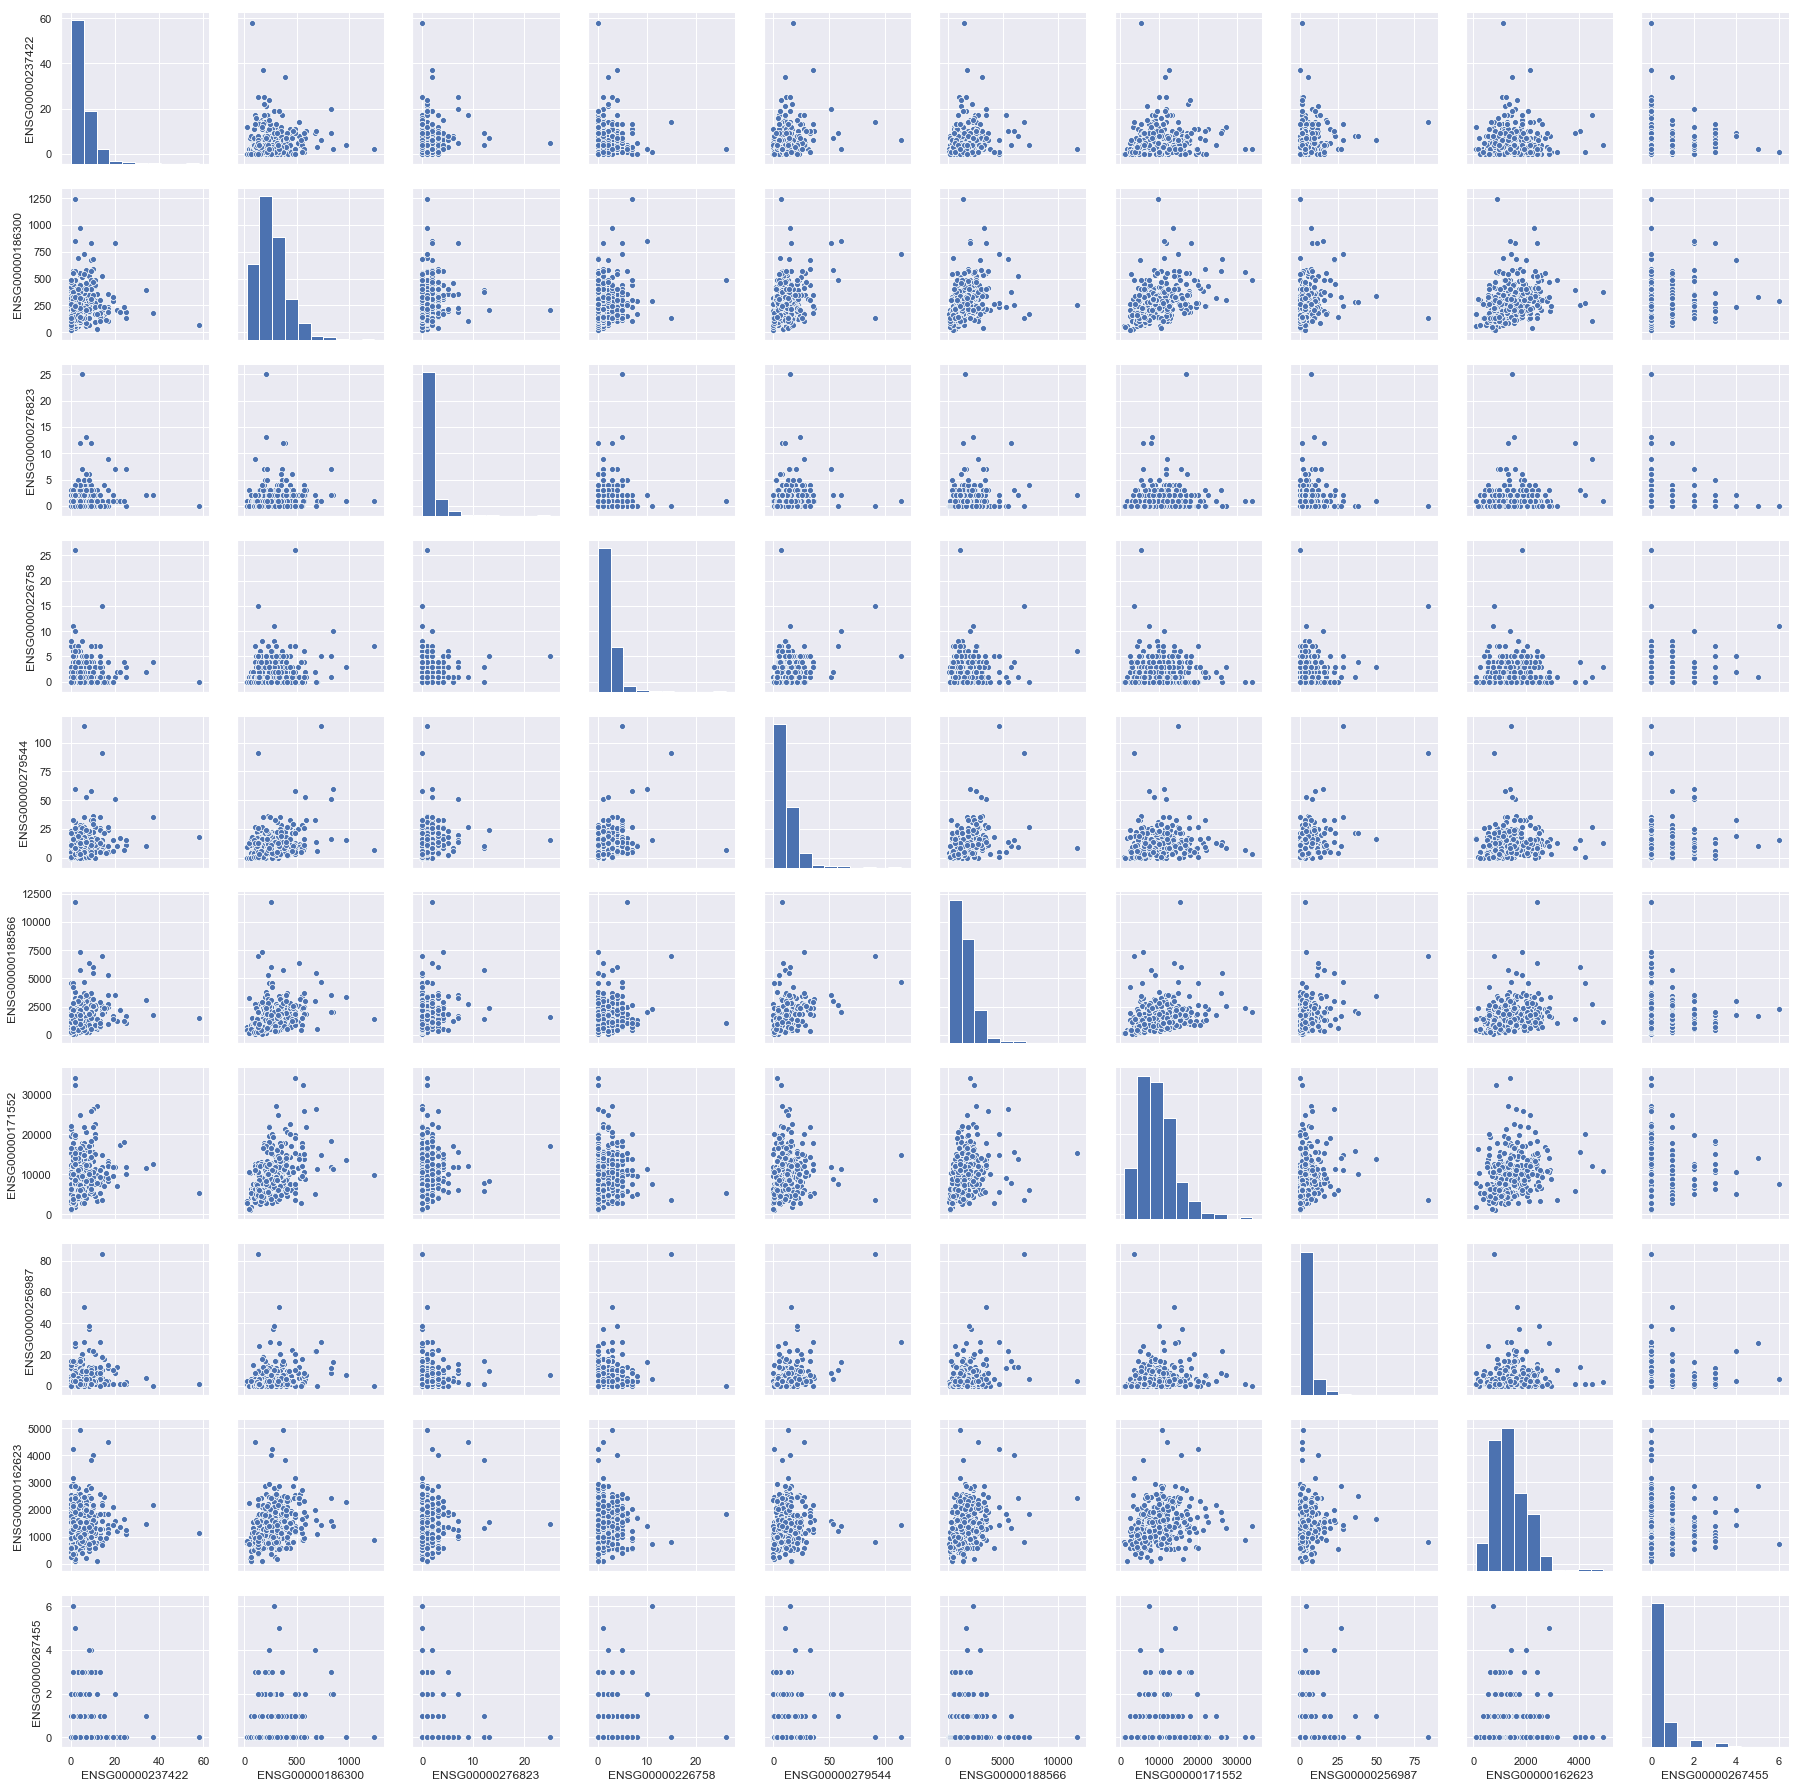

In [3]:
cl.multiple_scatters(ovary)

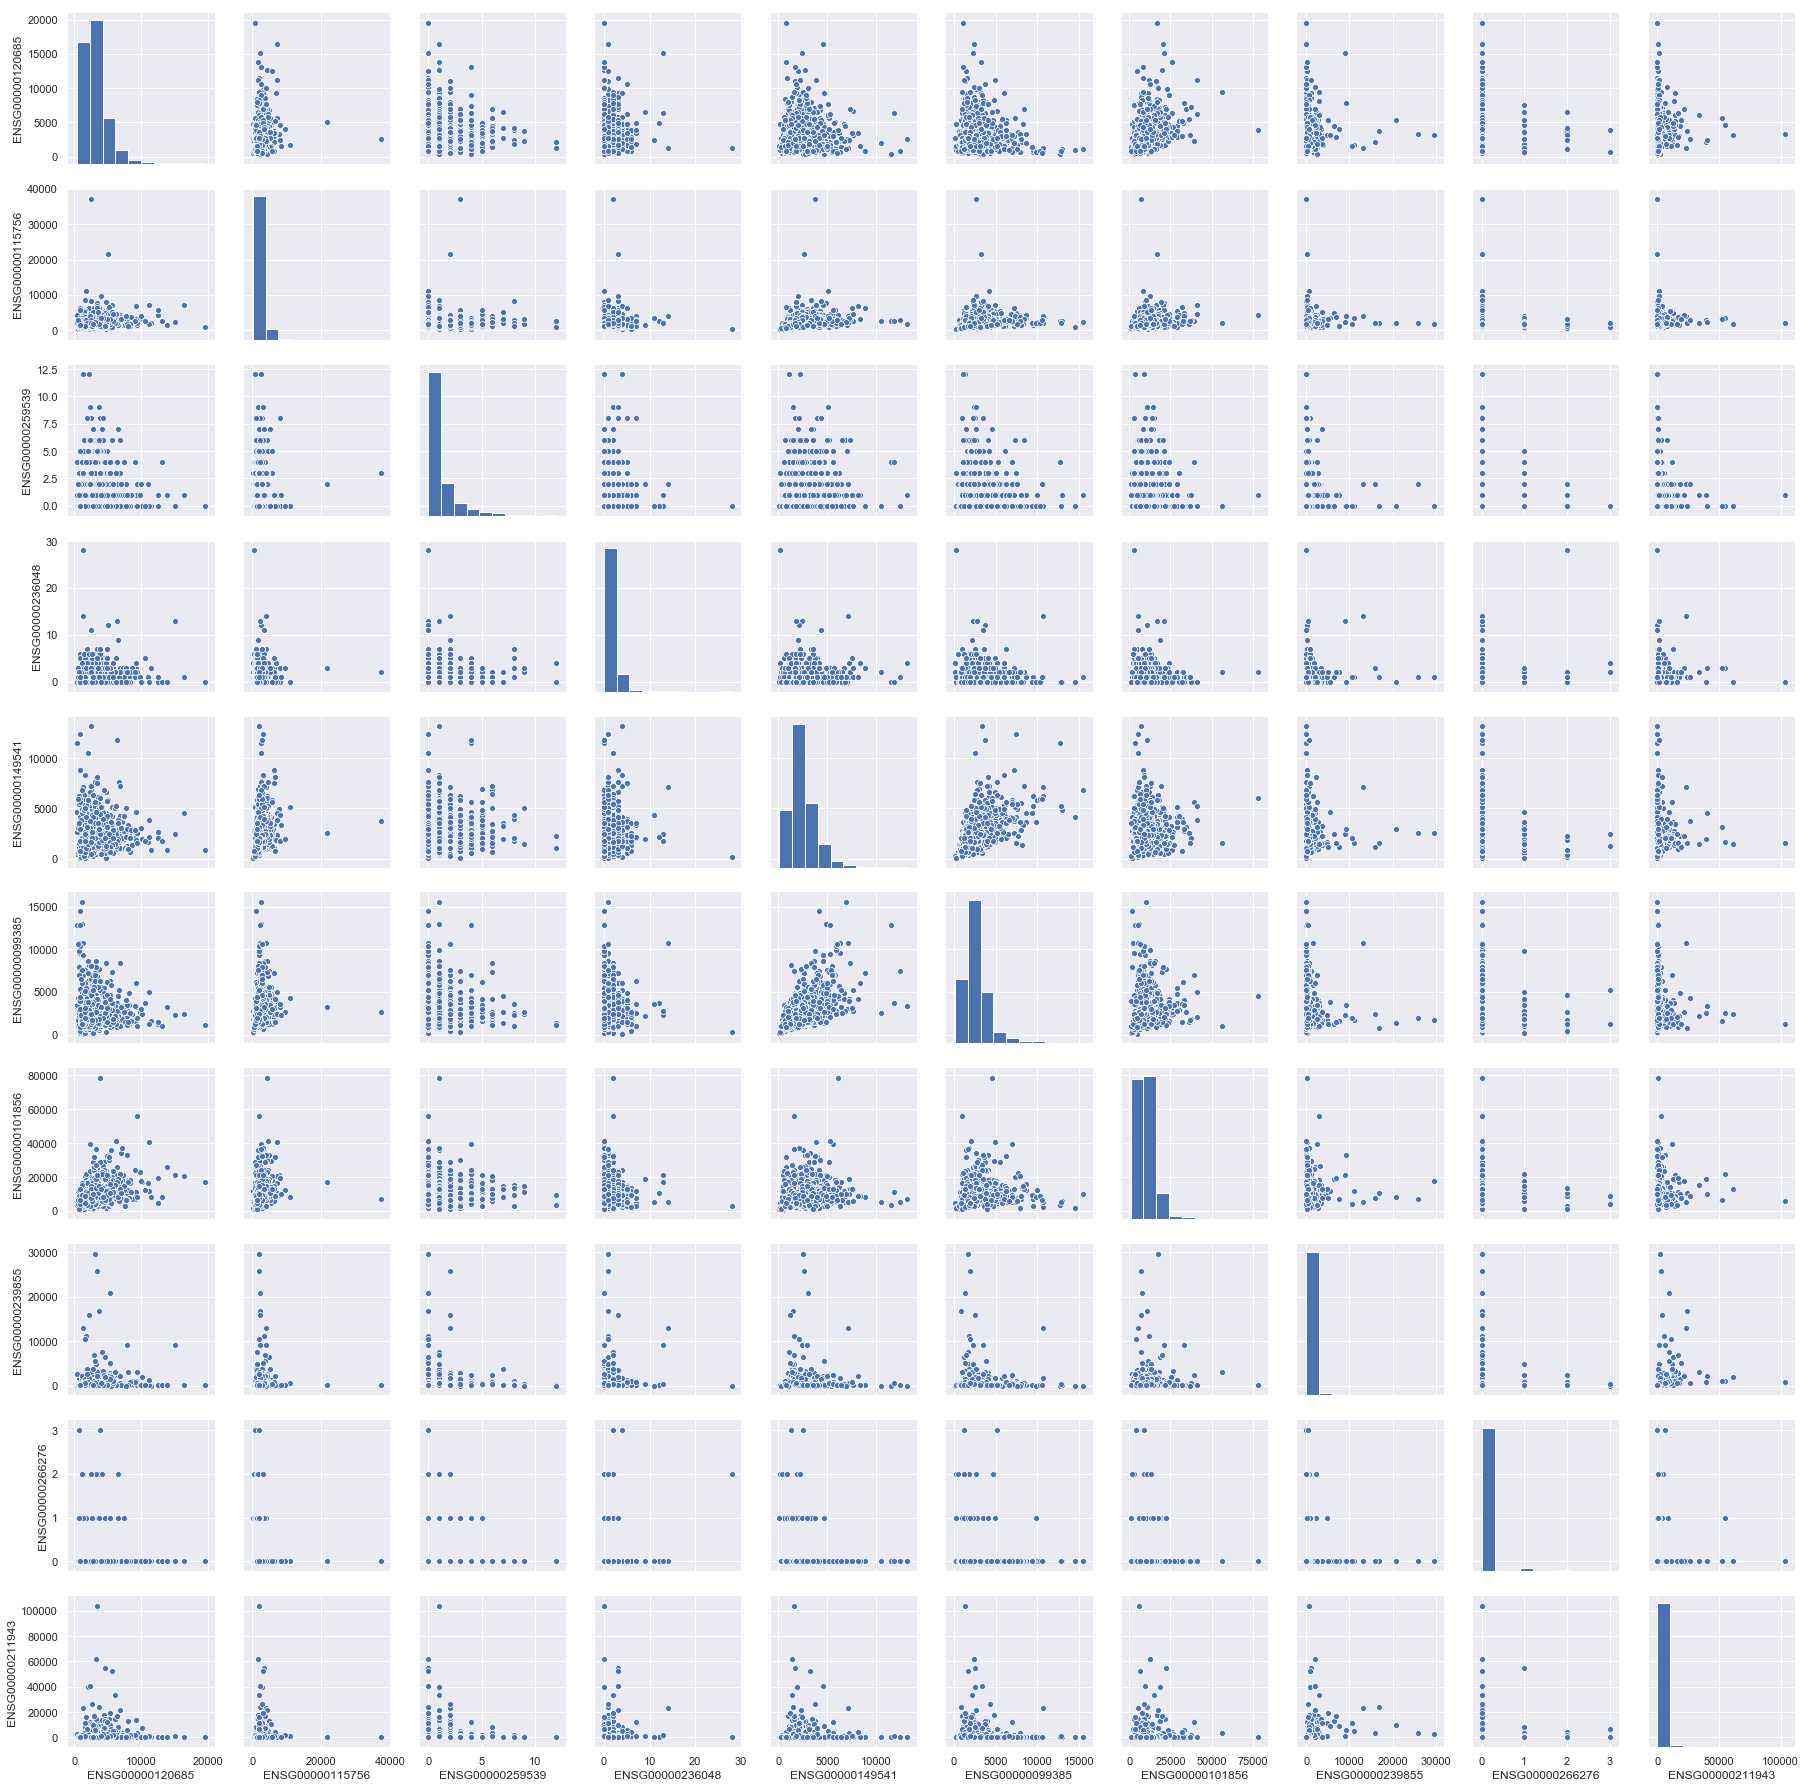

In [4]:
cl.multiple_scatters(breast)

There appears to be no clear distribution in the data as it exists, so I'll standardize it using the methods above. 

In [5]:
ovary_z = cl.standardizing(ovary, 'z')
ovary_mm = cl.standardizing(ovary, 'mm')
ovary_rob = cl.standardizing(ovary, 'robust')
ovary_gauss = cl.standardizing(ovary, 'gauss')

graphing for ovary standardized with z-scores


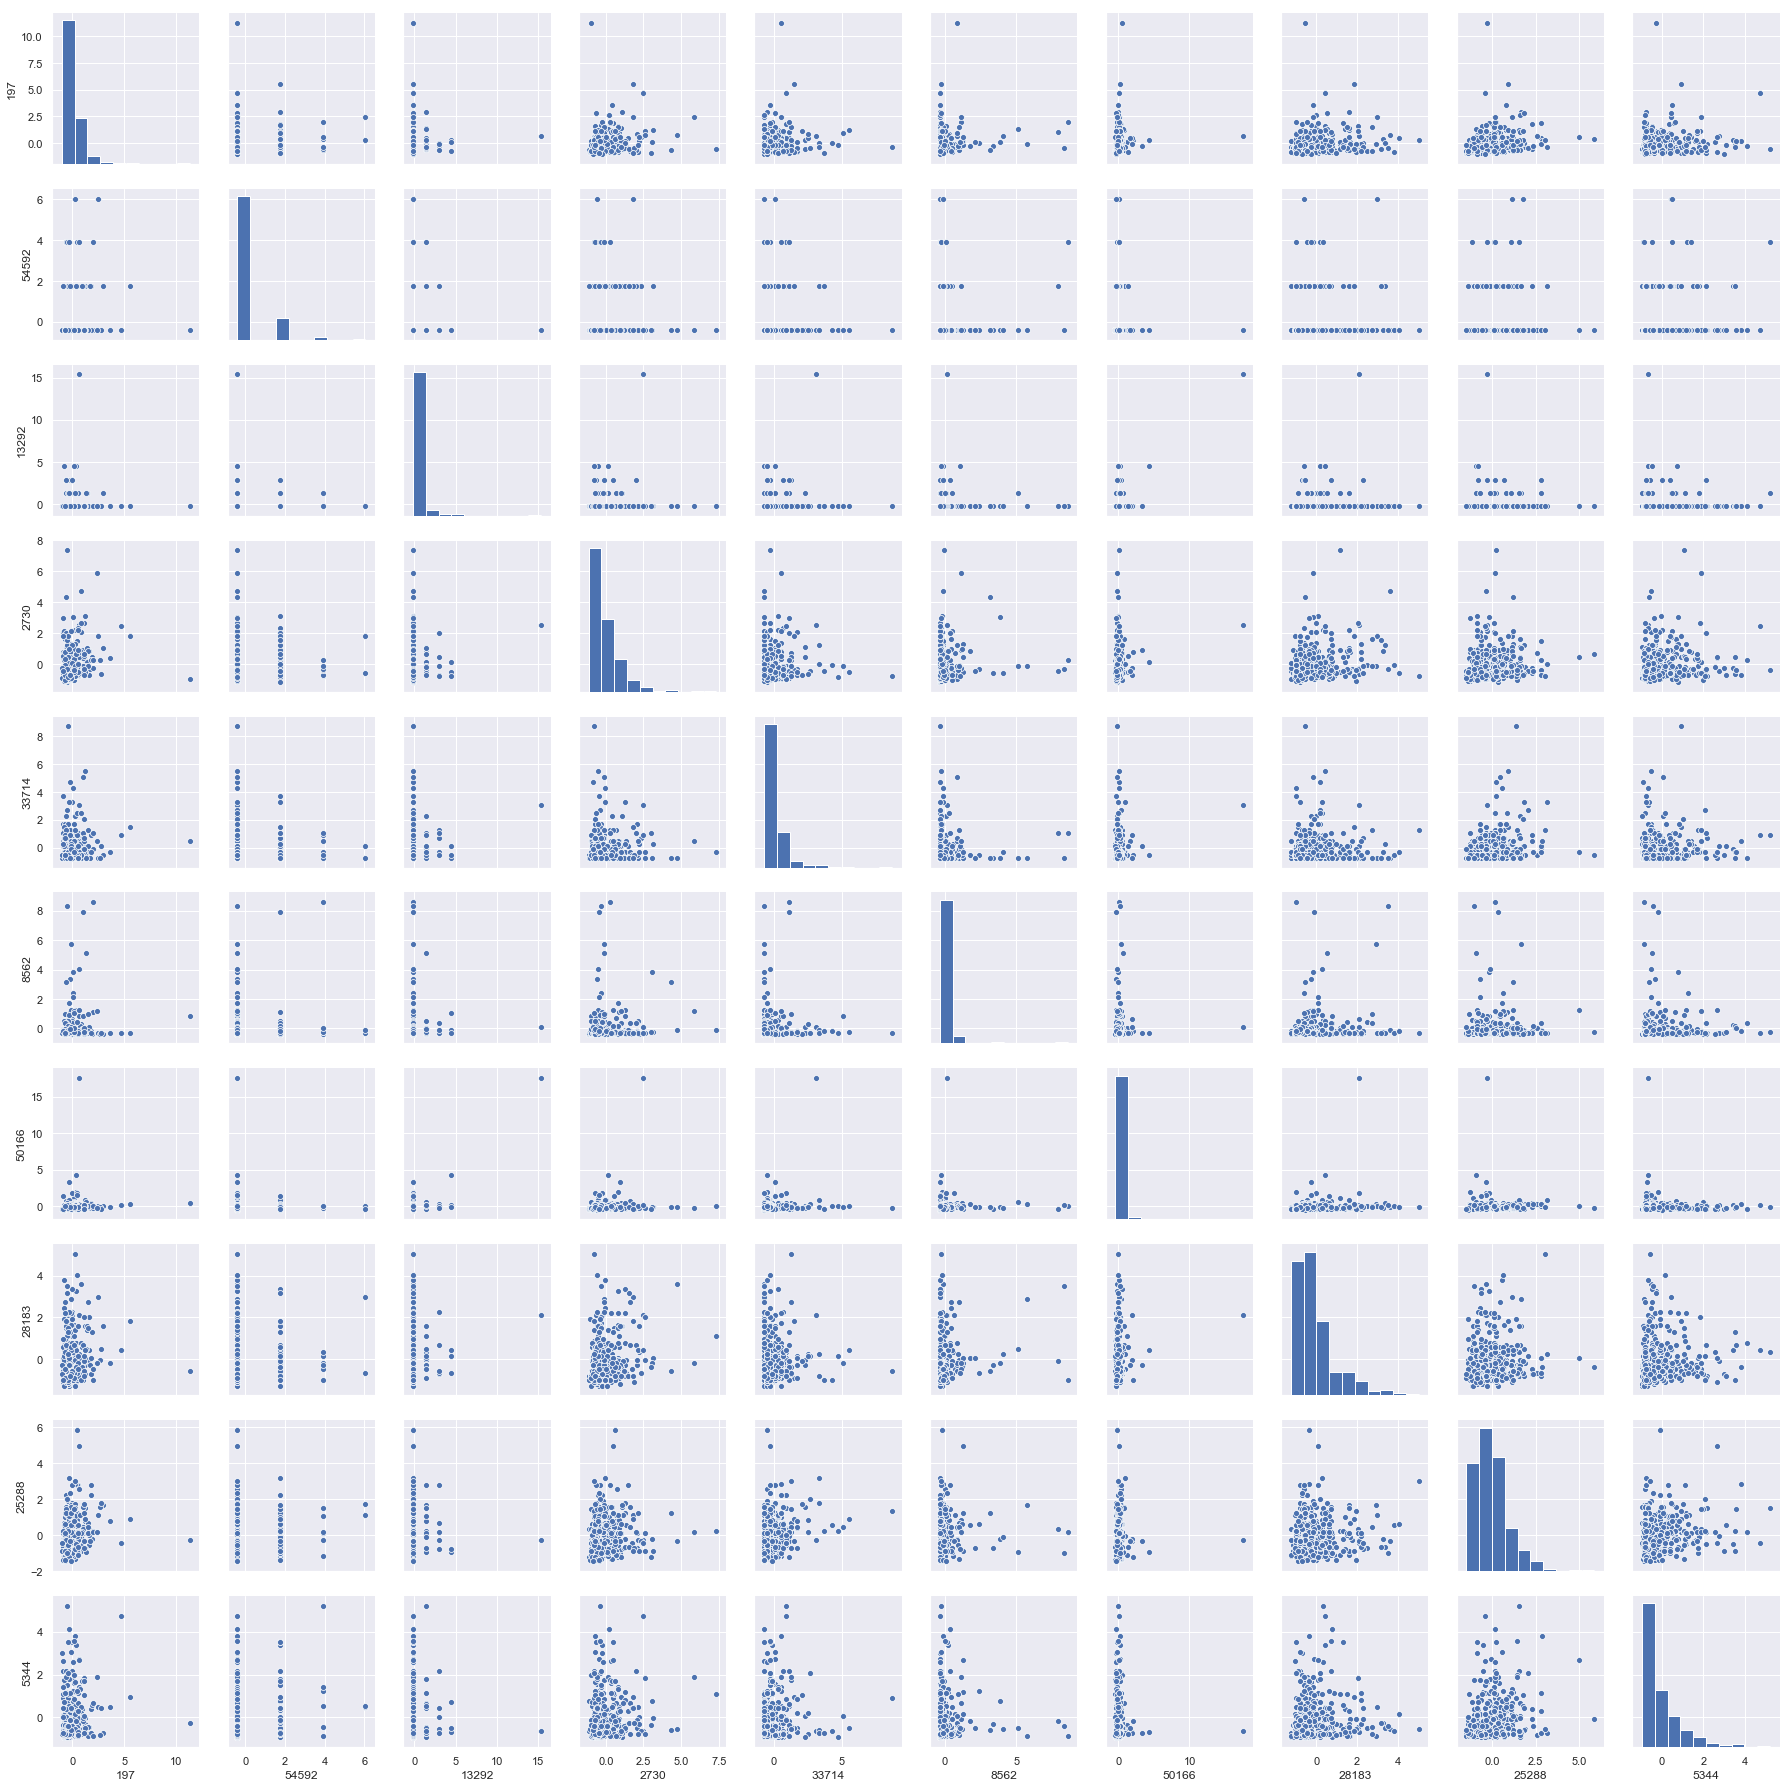

In [6]:
print('graphing for ovary standardized with z-scores')
cl.multiple_scatters(ovary_z)

graphing for ovary dataset standardized by min-max


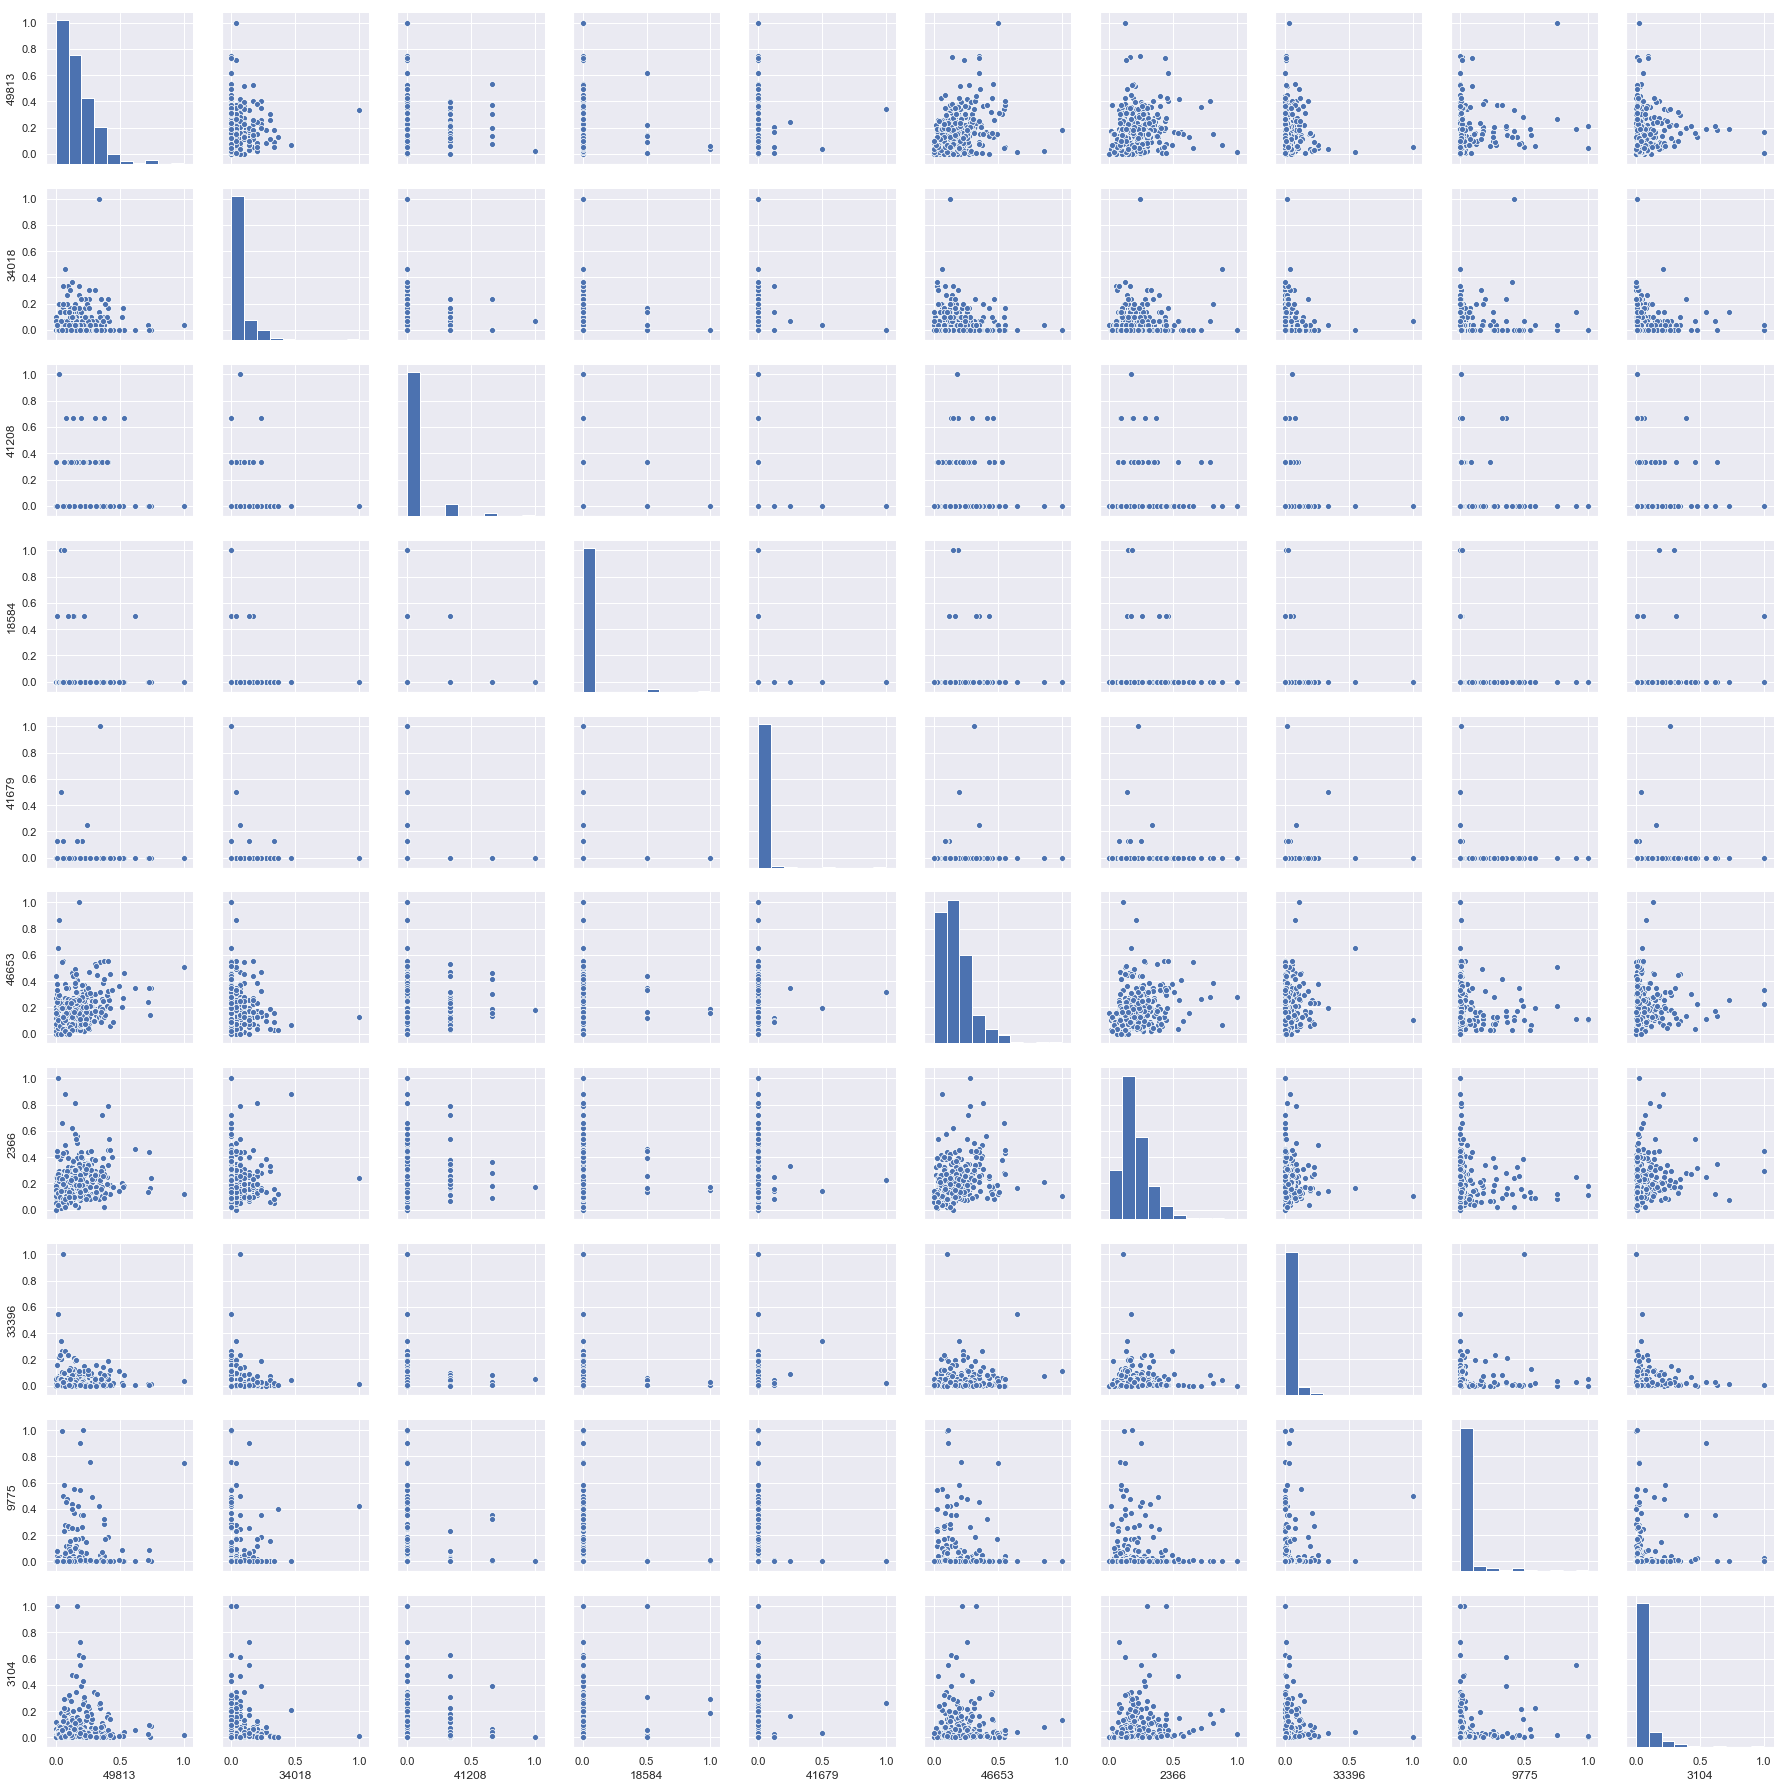

In [7]:
print('graphing for ovary dataset standardized by min-max')
cl.multiple_scatters(ovary_mm)

graphing for ovary dataset standardized by robust


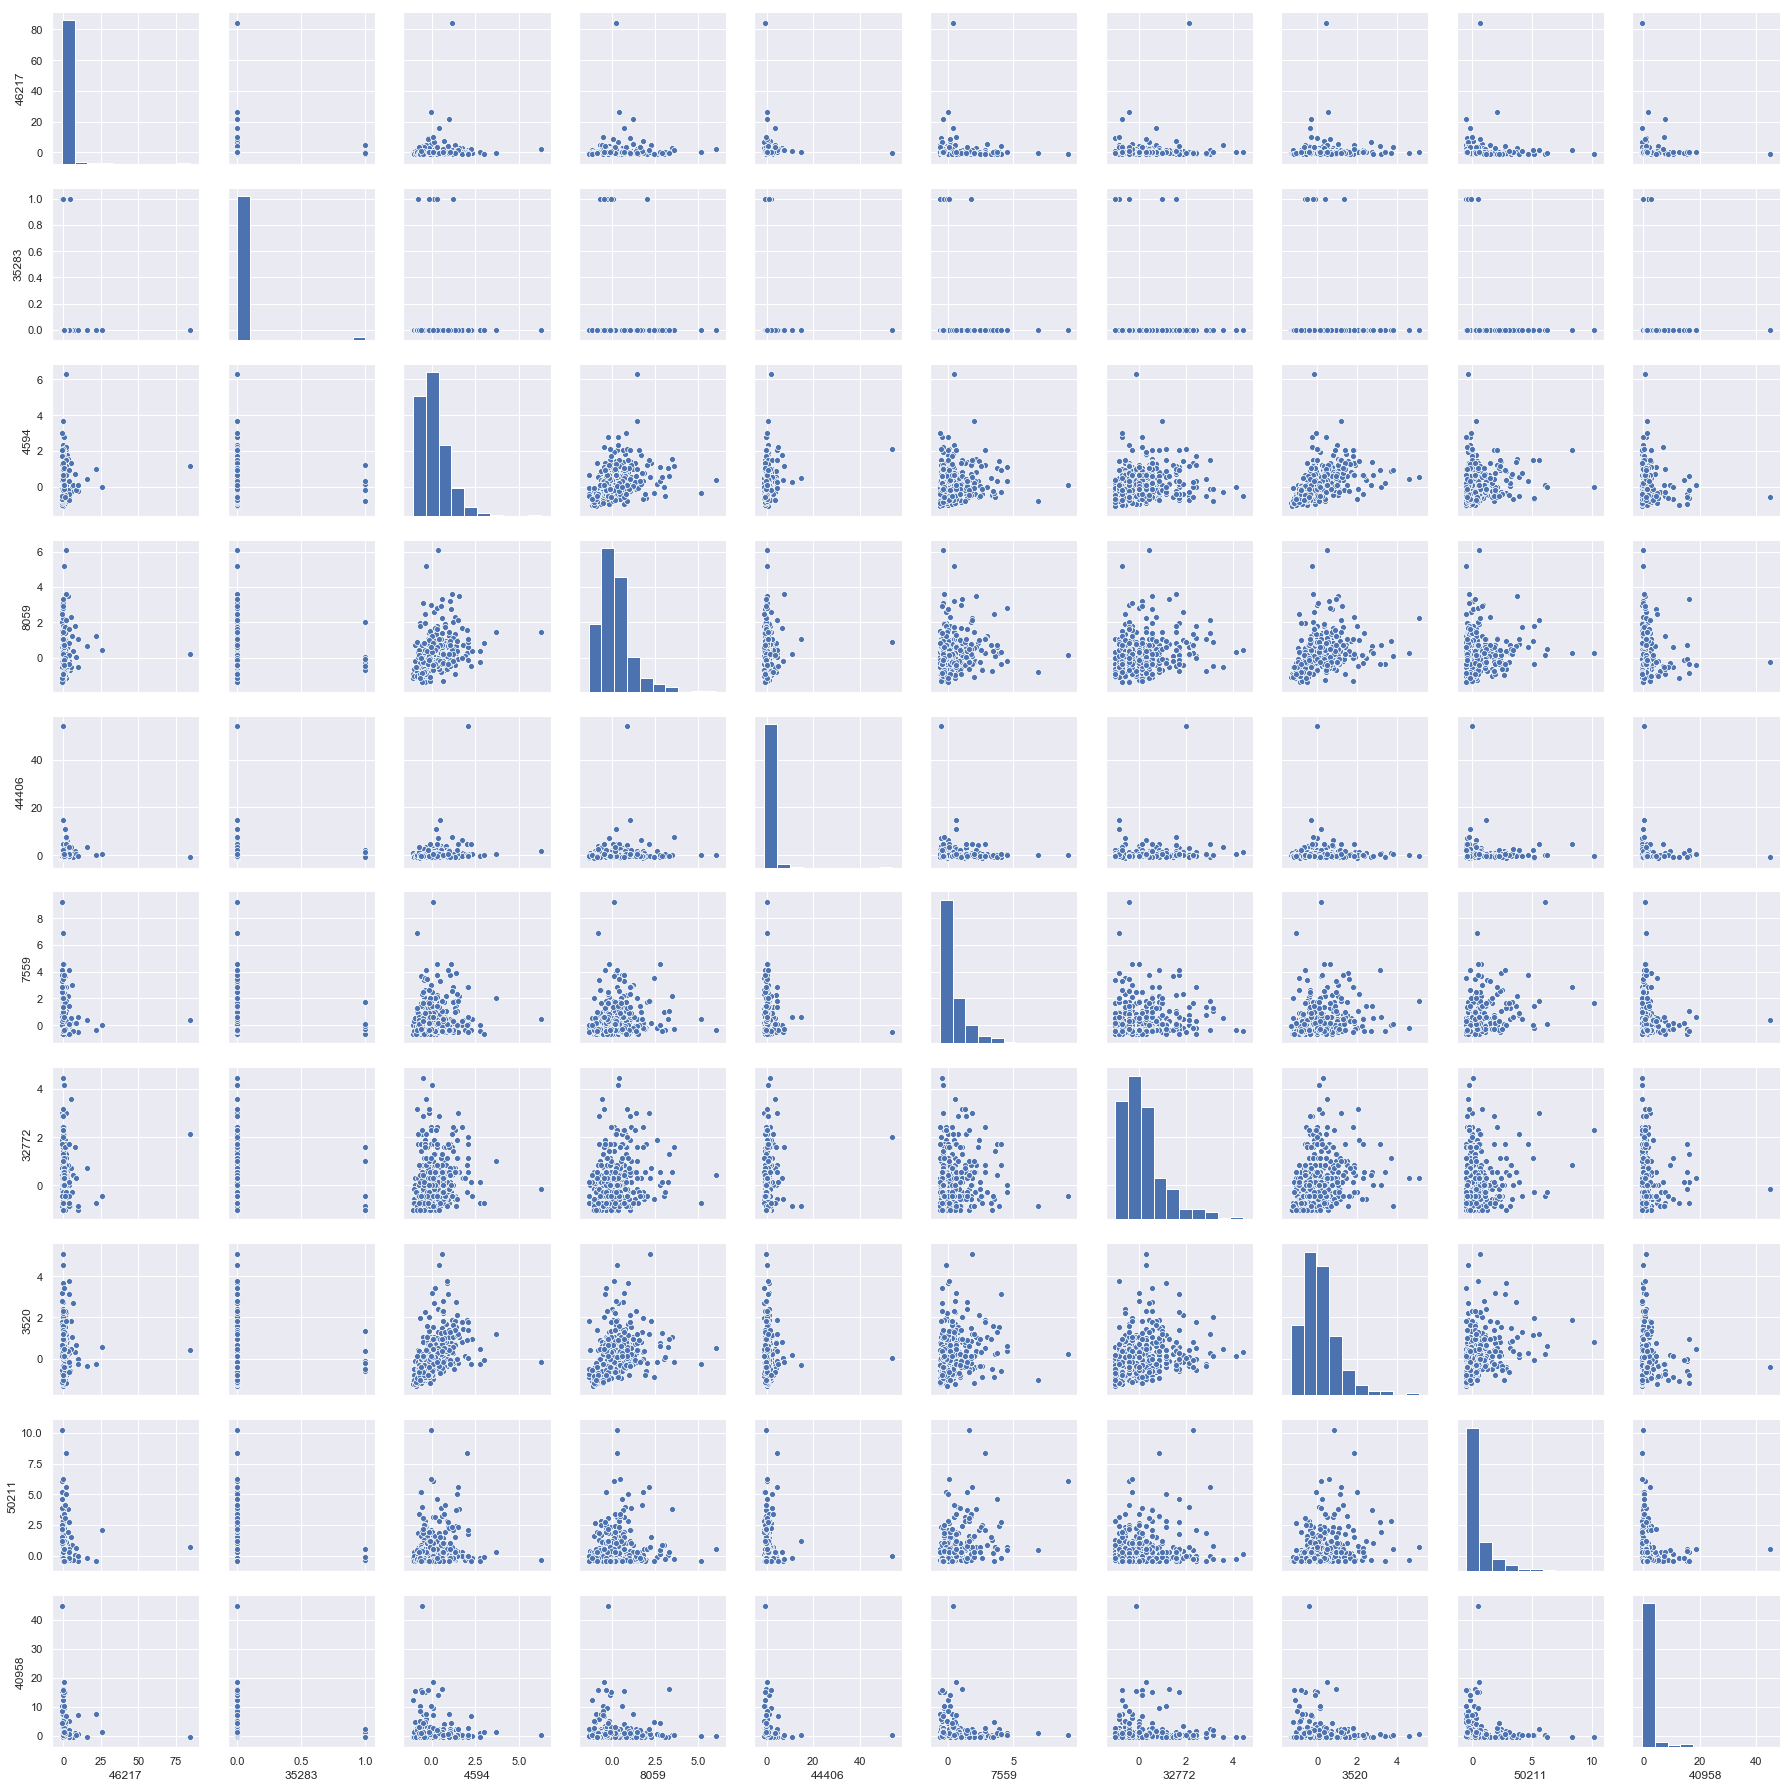

In [8]:
print('graphing for ovary dataset standardized by robust')
cl.multiple_scatters(ovary_rob)

graphing for ovary dataset standardized by gaussian attempt


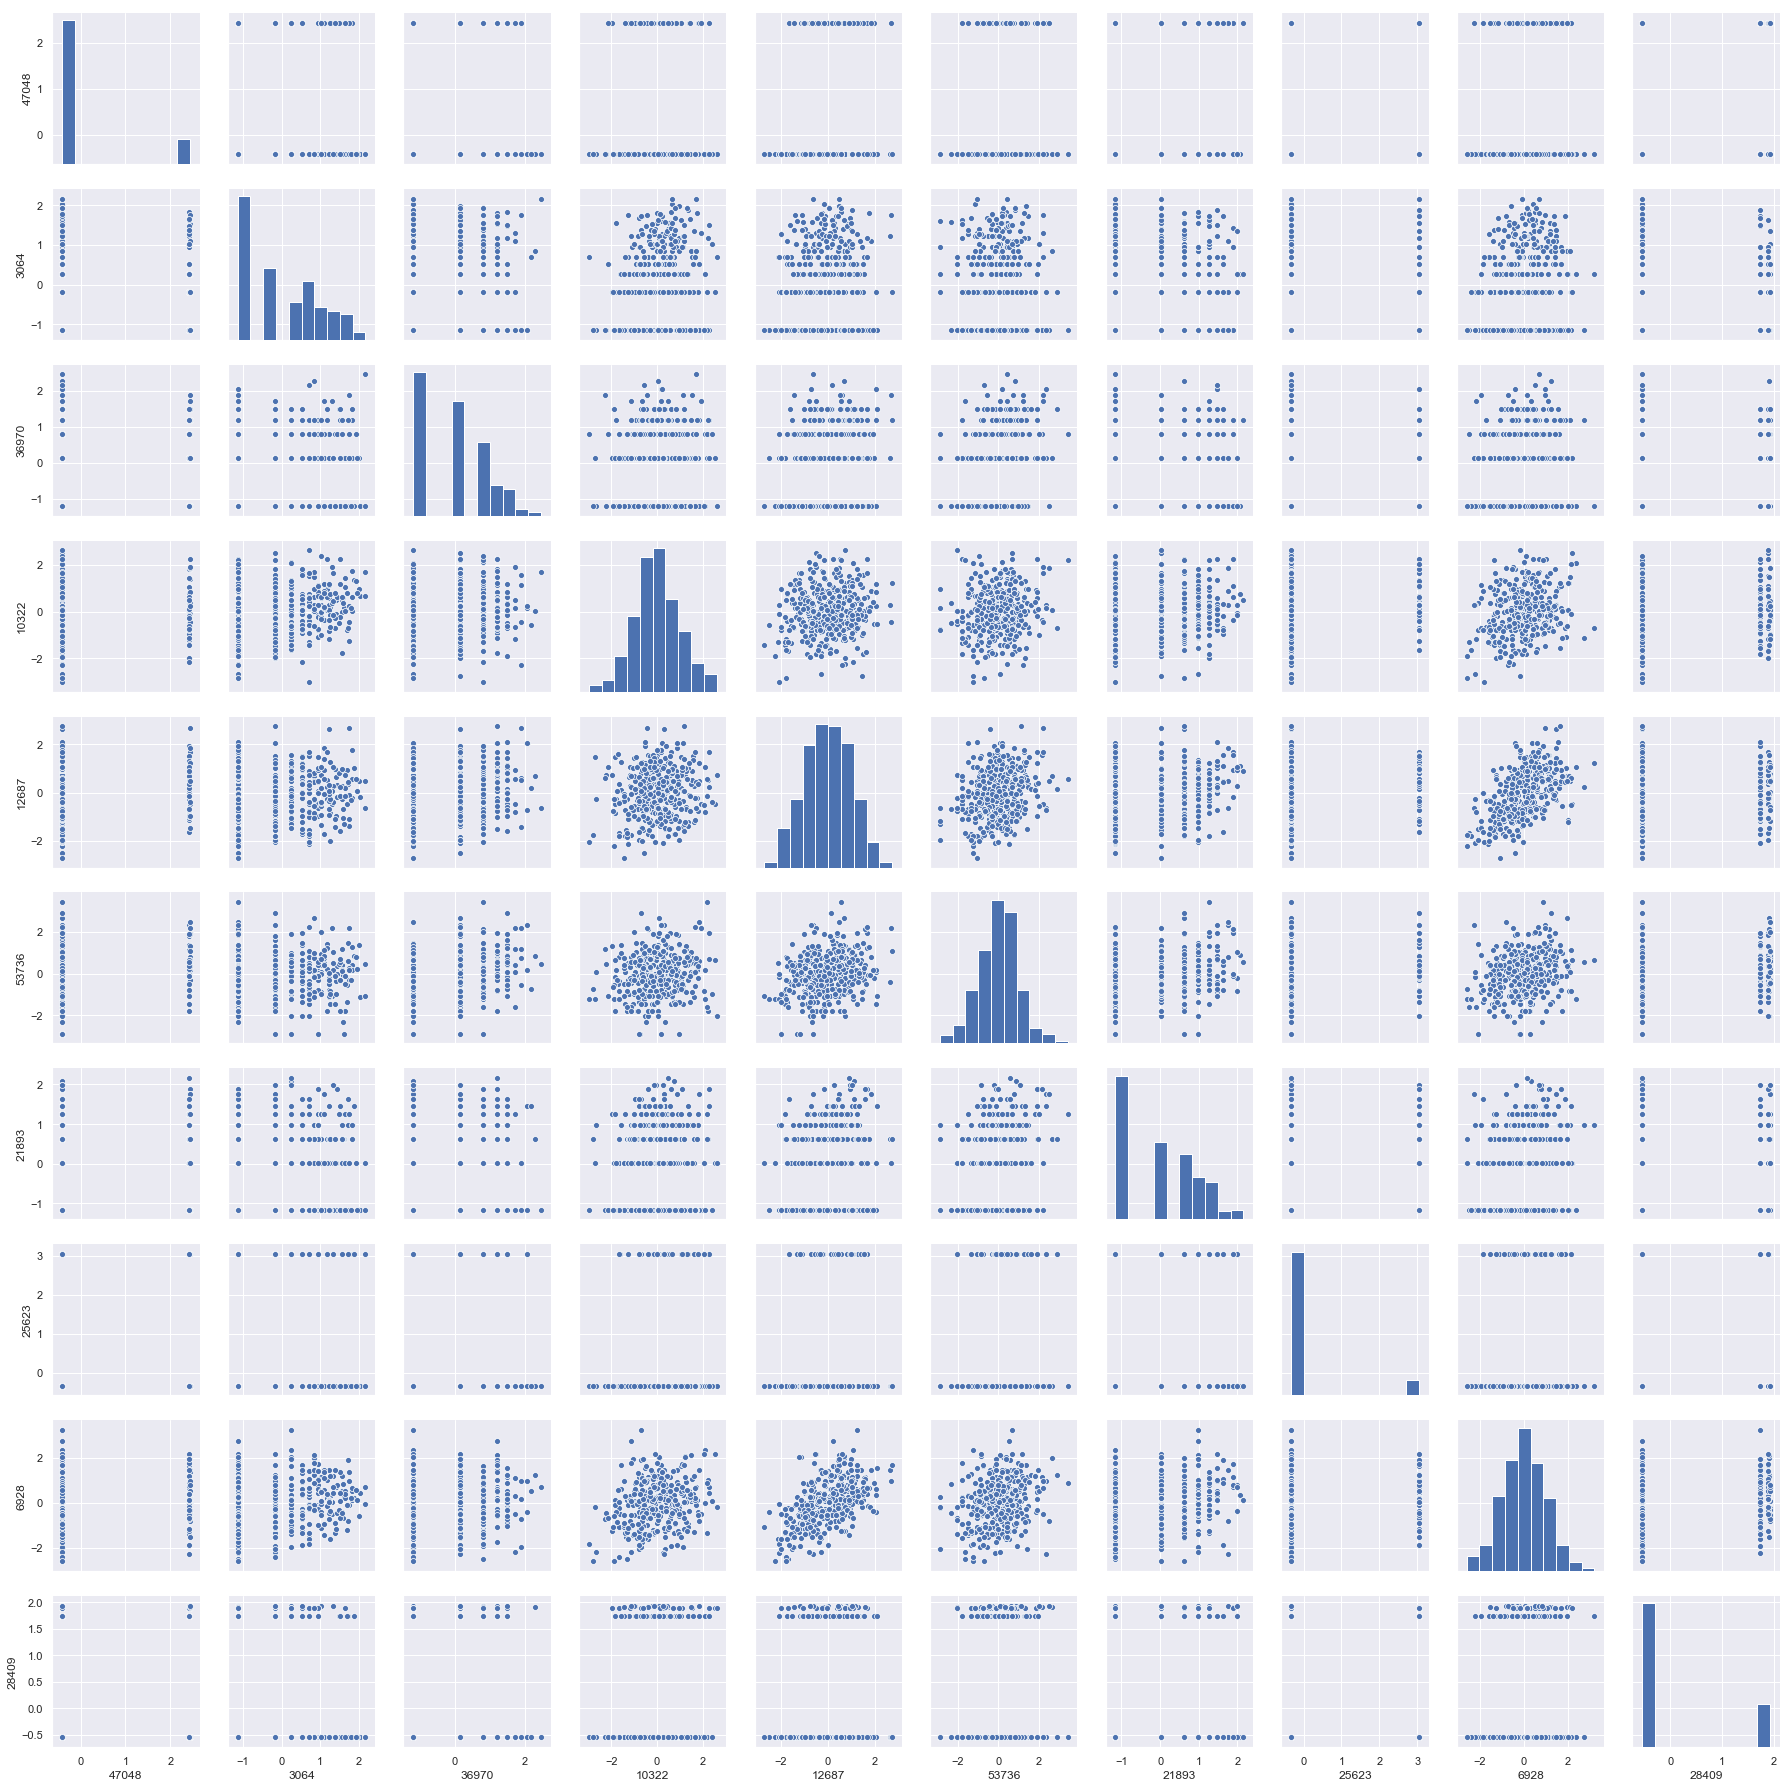

In [9]:
print('graphing for ovary dataset standardized by gaussian attempt')
cl.multiple_scatters(ovary_gauss)

It's clear from above that min-max approach is clearly not the best way to standardize the ovary dataset, it appears that z-score and gaussian might be the better ways to standardize. Now on to breast cancer data.

In [10]:
breast_z = cl.standardizing(breast, 'z')
breast_mm = cl.standardizing(breast, 'mm')
breast_rob = cl.standardizing(breast, 'robust')
breast_gauss = cl.standardizing(breast, 'gauss')

graphing for breast standardized with z-scores


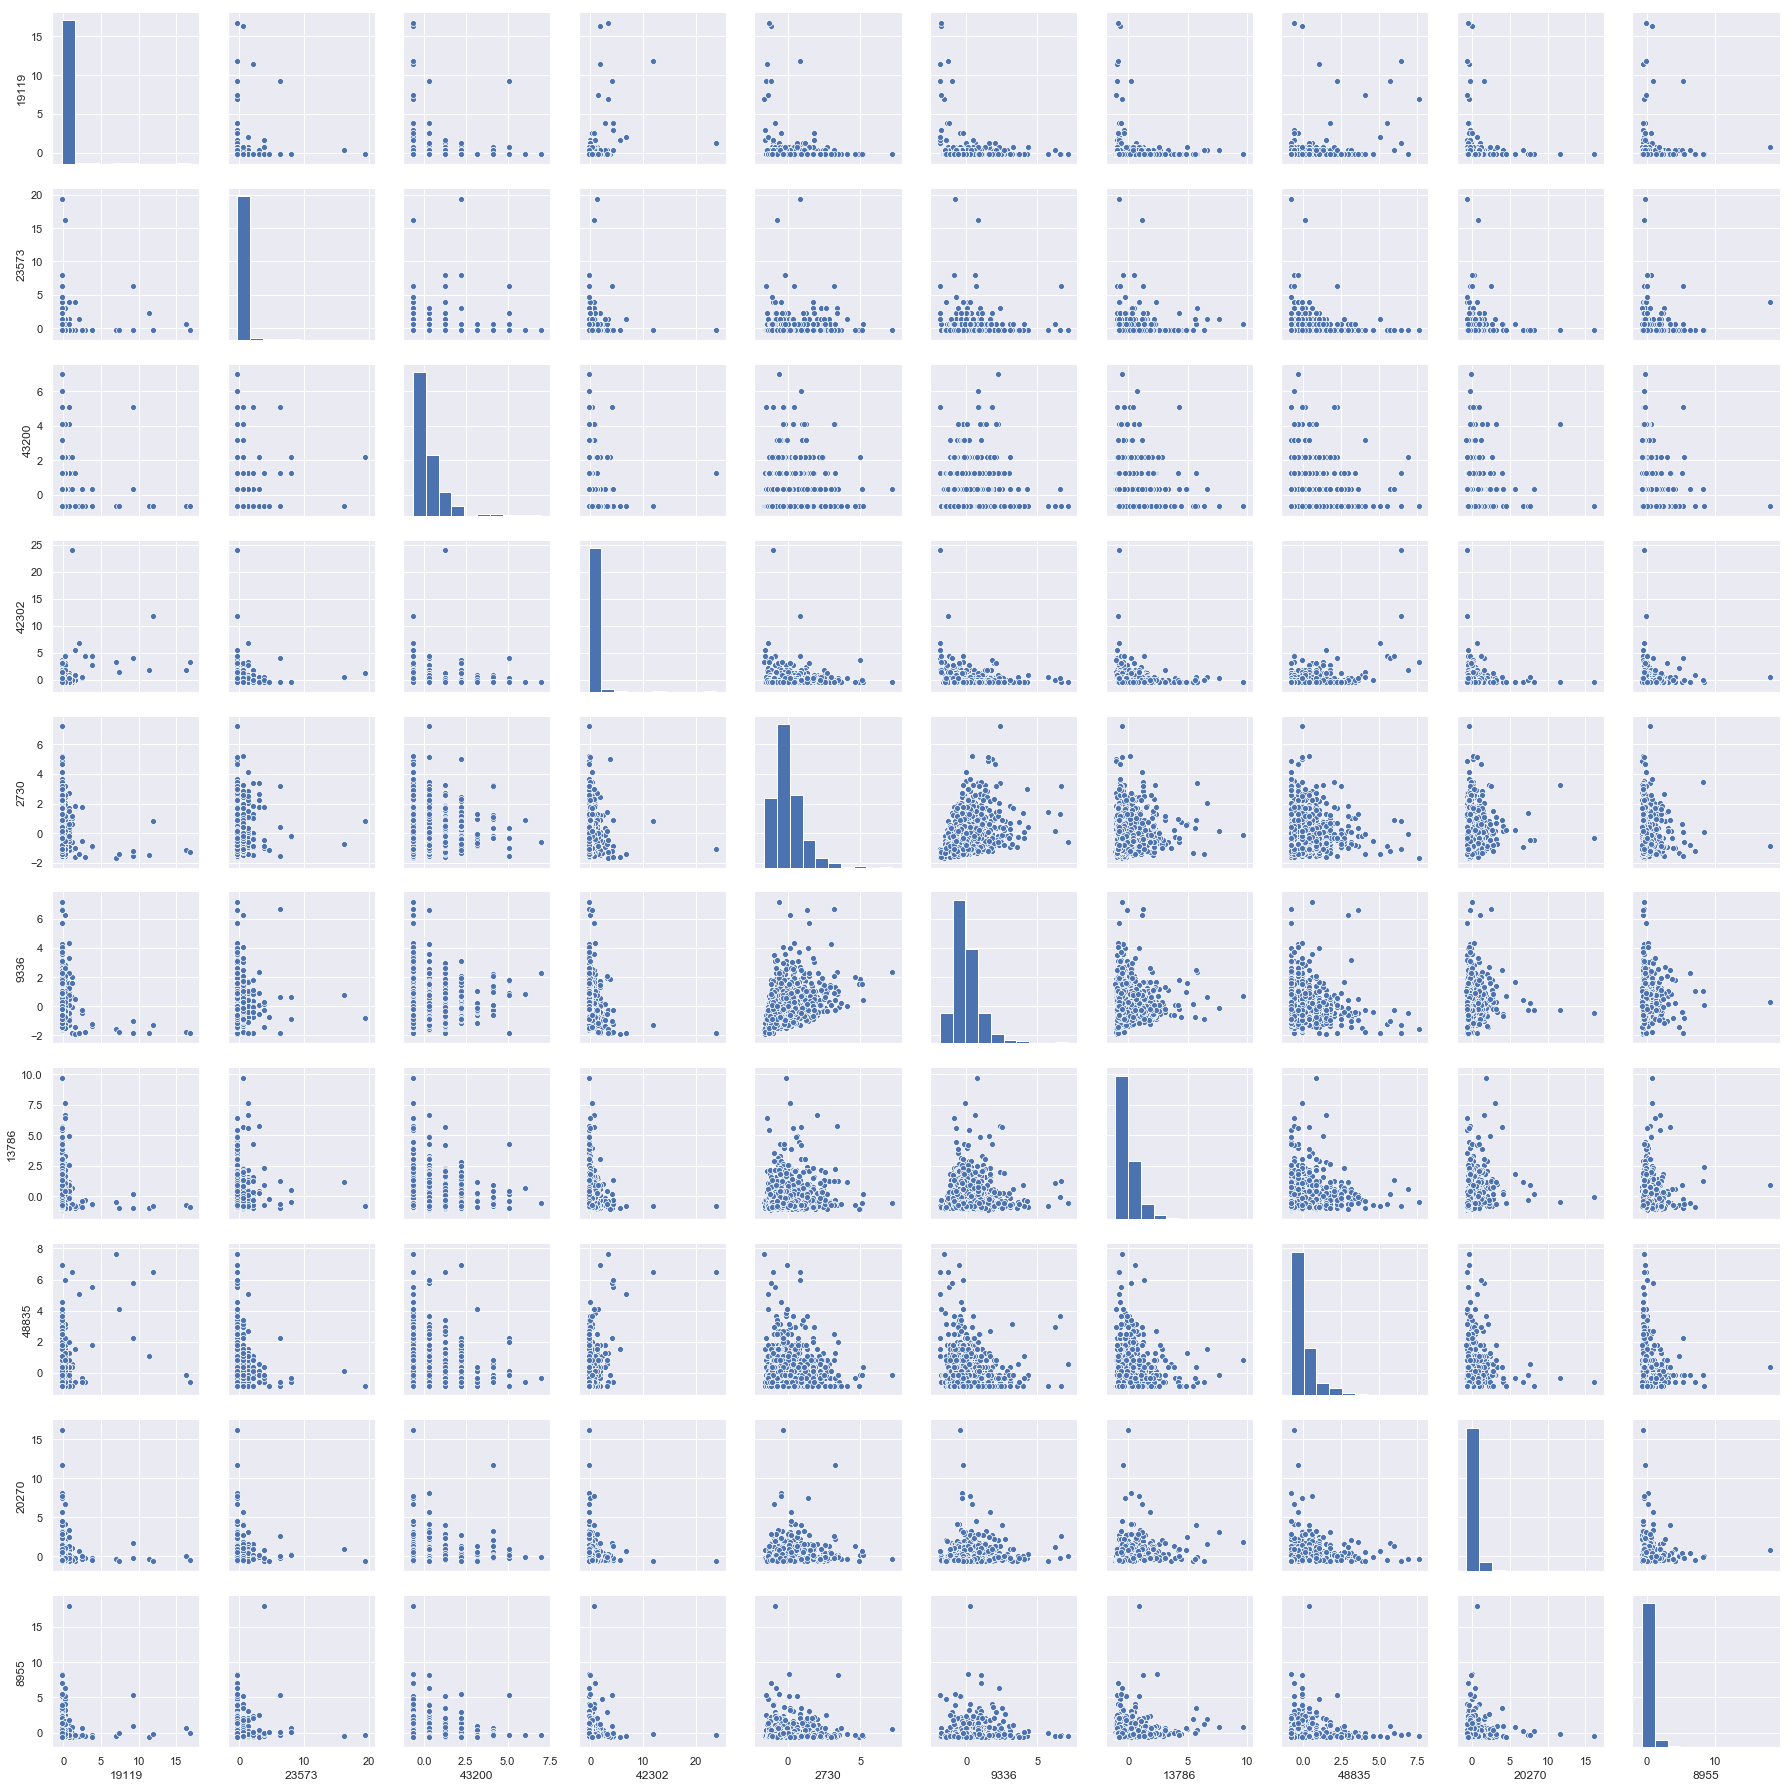

In [11]:
print('graphing for breast standardized with z-scores')
cl.multiple_scatters(breast_z)

graphing for breast standardized with mm


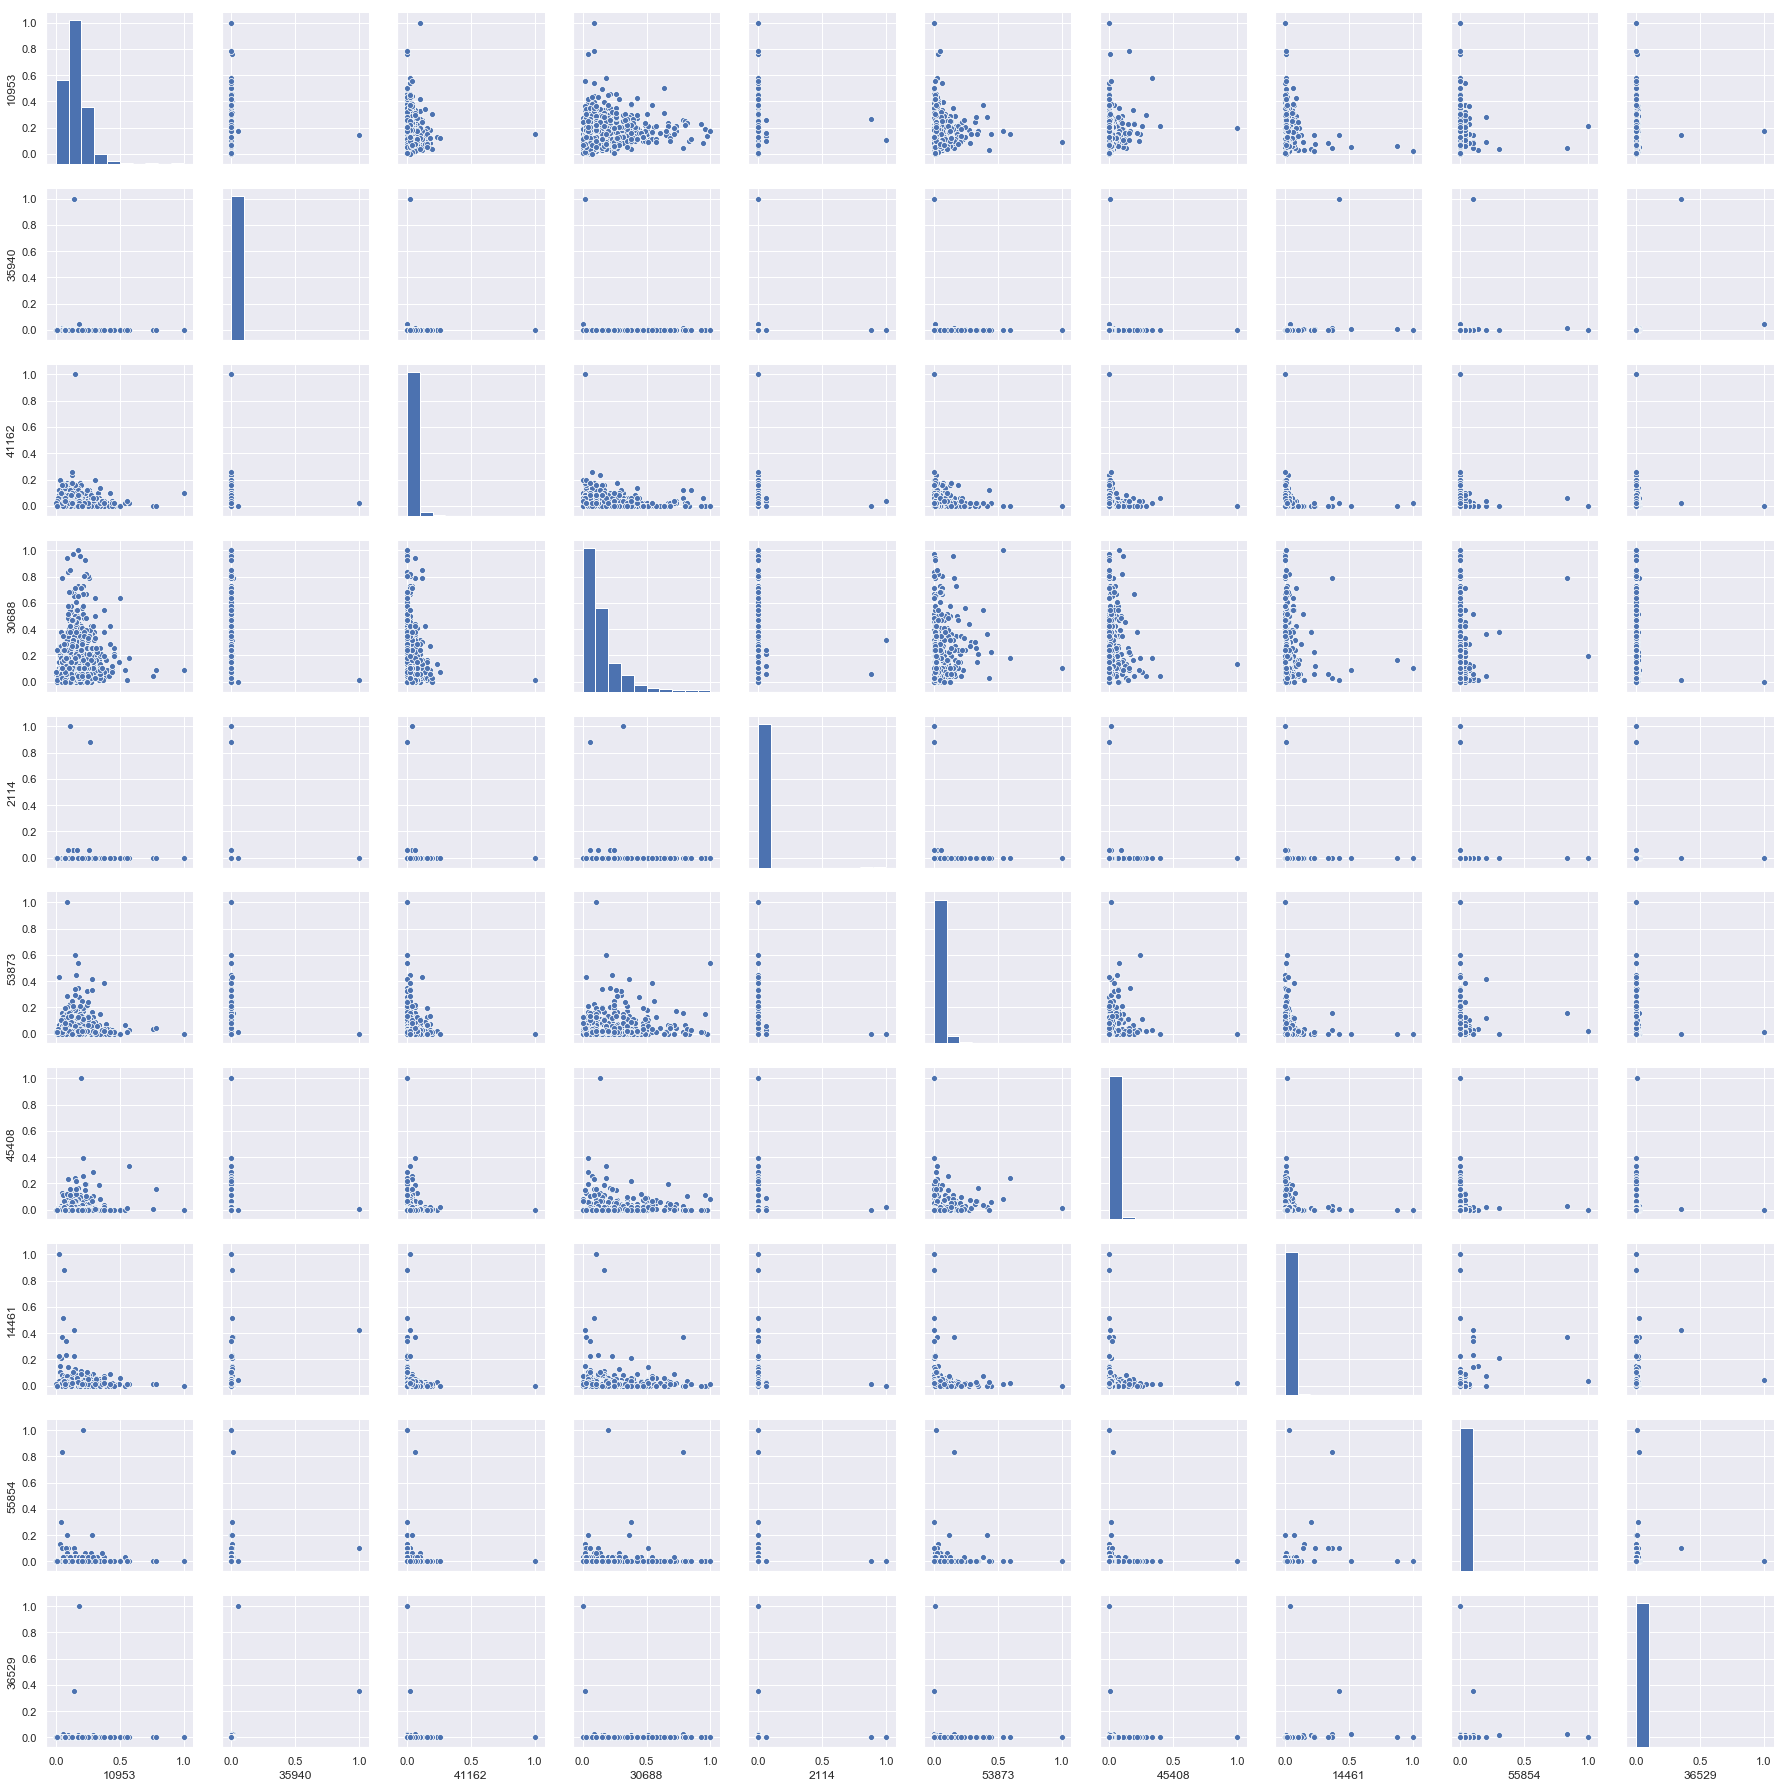

In [12]:
print('graphing for breast standardized with mm')
cl.multiple_scatters(breast_mm)

graphing for breast standardized with robust


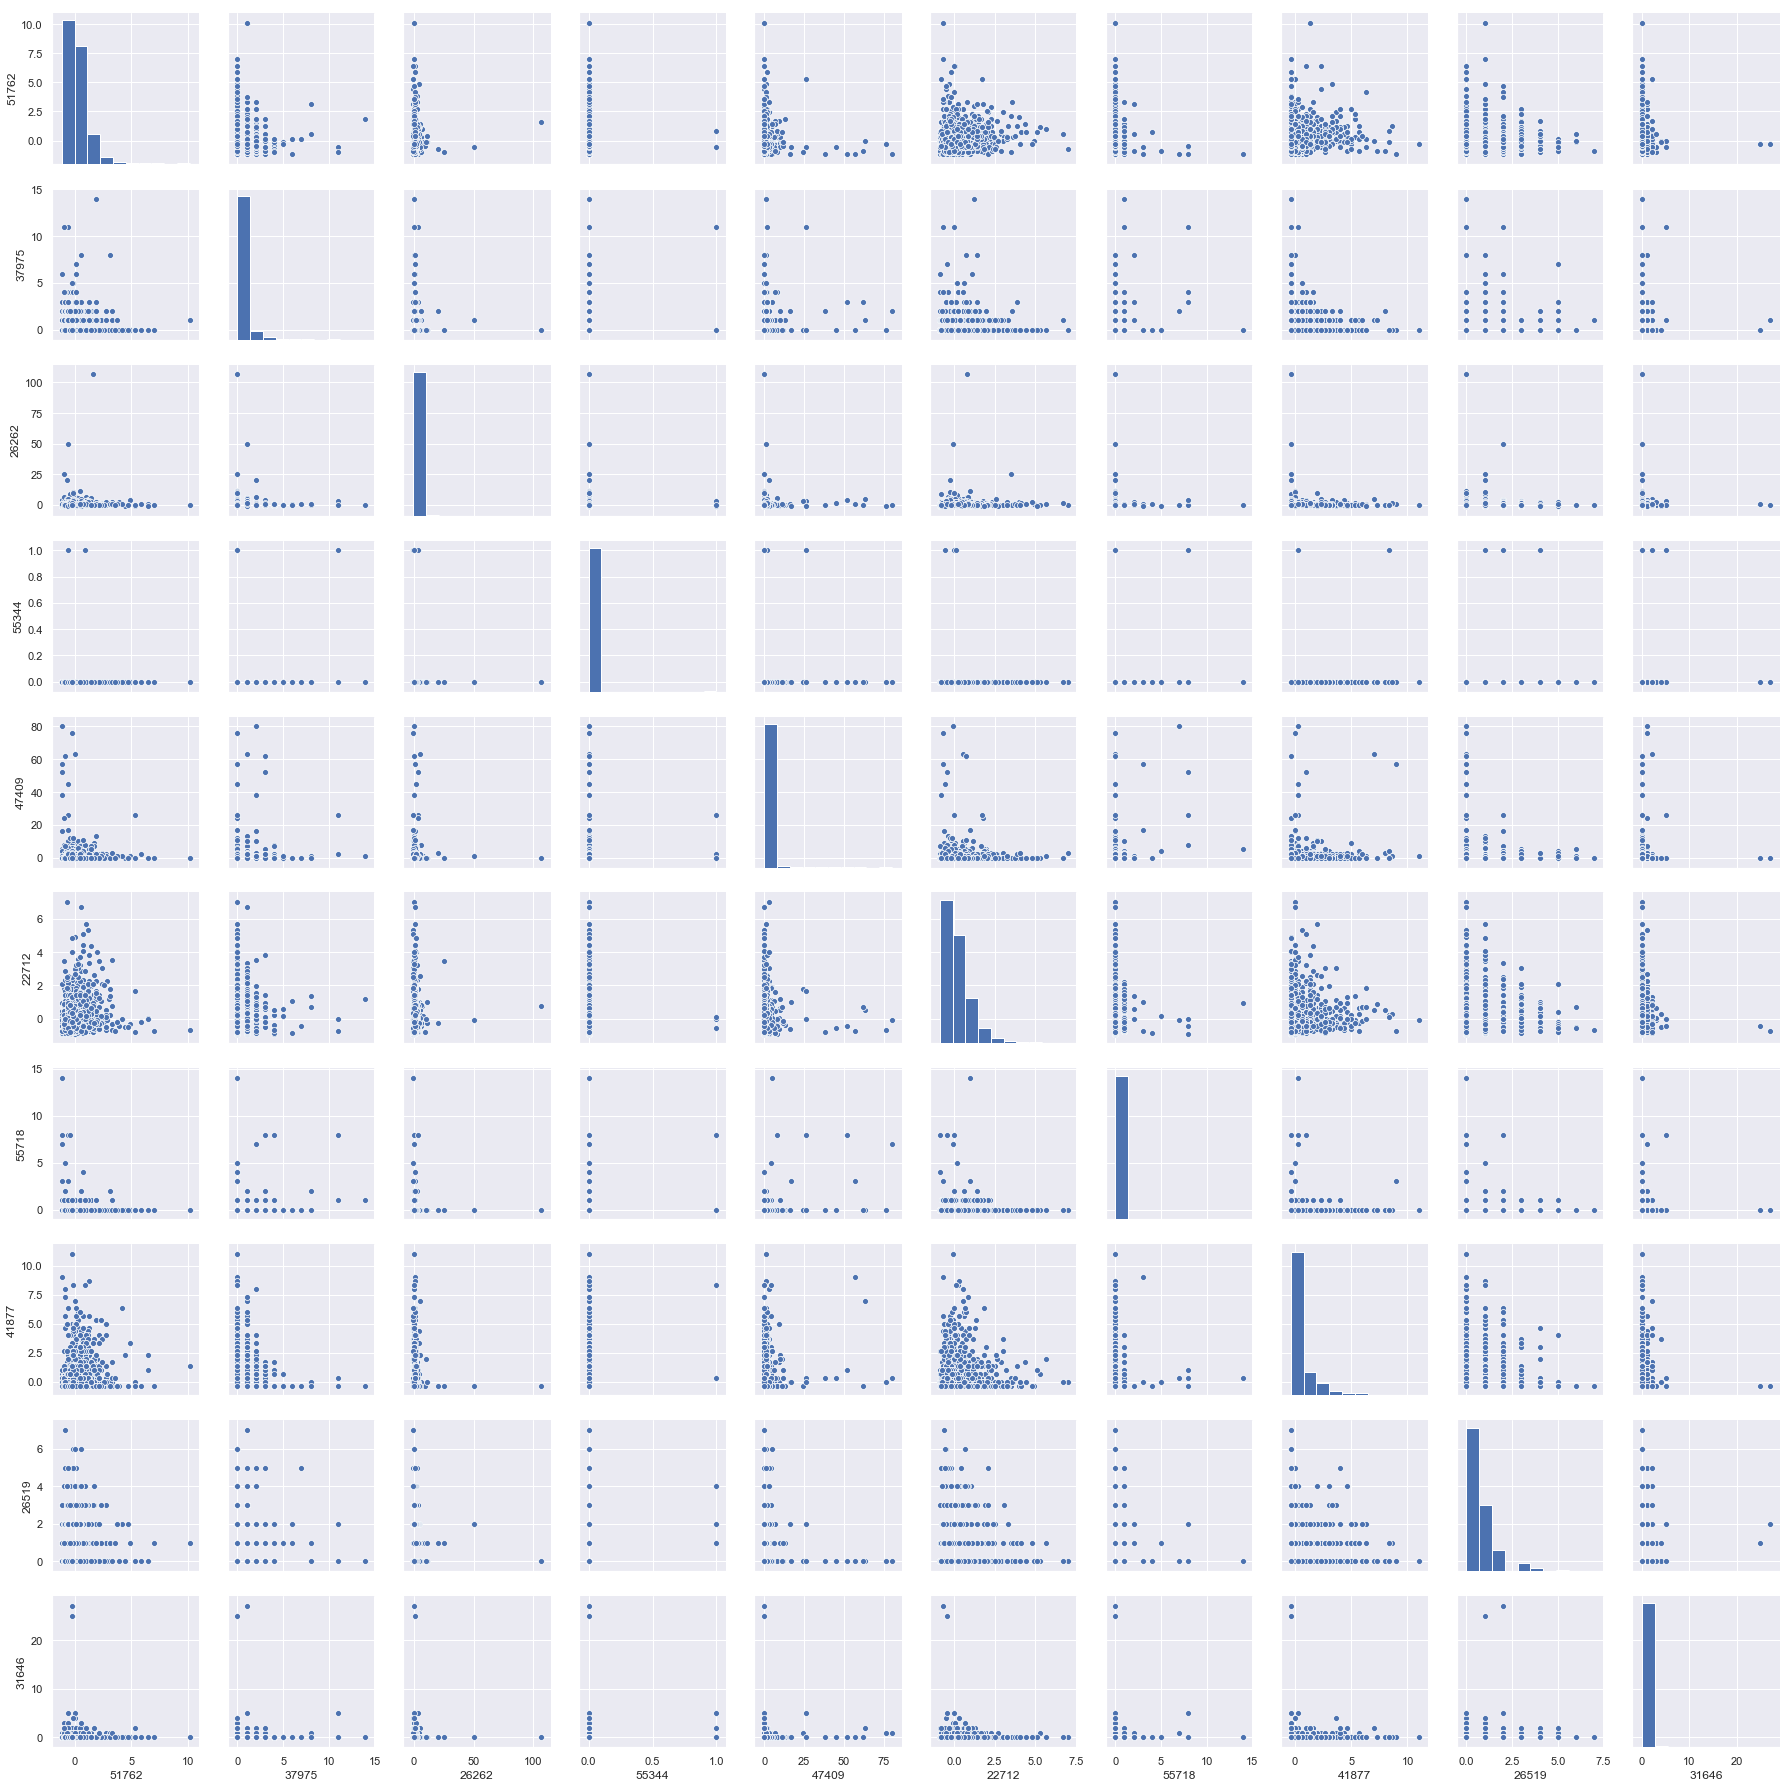

In [13]:
print('graphing for breast standardized with robust')
cl.multiple_scatters(breast_rob)

graphing for breast standardized with gaussian


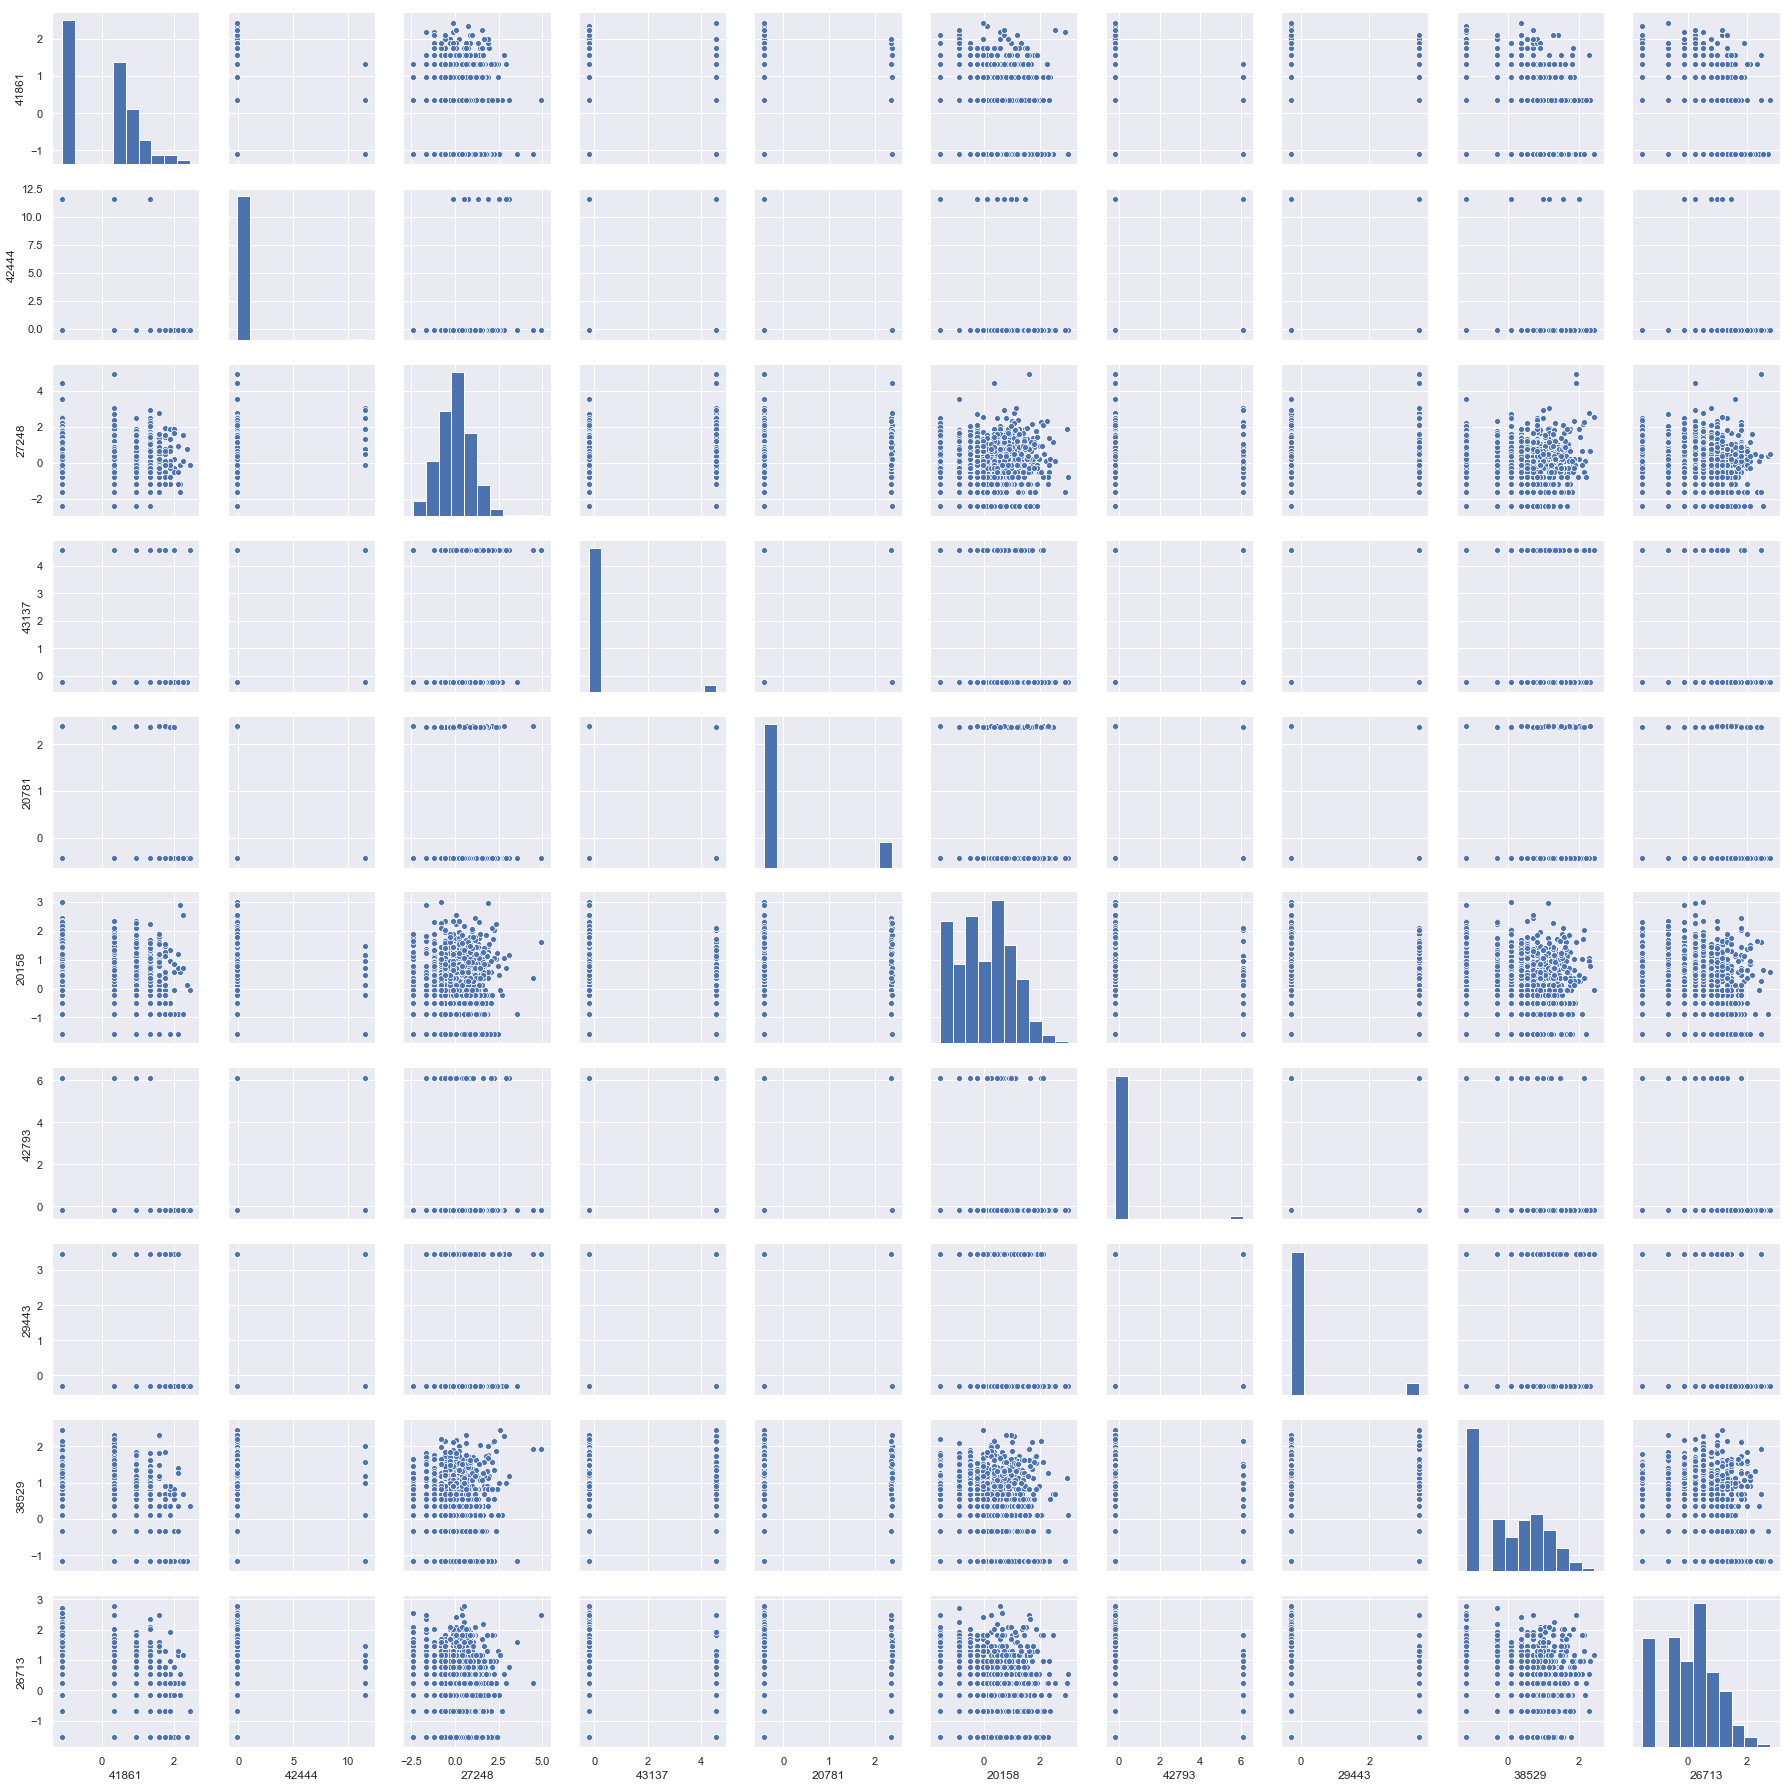

In [14]:
print('graphing for breast standardized with gaussian')
cl.multiple_scatters(breast_gauss)

Much like for ovarian cancer, it appears that z-score and gaussian standardization create the most variance and might therefore be the best approaches here. Moving forward, I'll use the gaussian standardized data. 

#### Q2) Algorithms for clustering

There are a number of clustering algorithms which can be employed, and they differ in their distance metrics. Generally, distance metrics are either divided into euclidean (location-based) and not-euclidean distances. For the purposes of this assignment, I will four clustering algoritms:
* KMeans clustering - divides observations into k clusters in which observation belongs to the cluster with the nearest mean. 
* Mean Shift clustering - shifts observations itieratively to a higher density region until convergence. 
* Spectral clustering - uses eigenvalues of the similarity matrix to reduce dimensions before clustering along those dimensions, somewhat akin to PCA.
* Agglomerative clustering - a type of hierarchical clustering in which you start with all the data as it's own independent cluster and you slowly cluster it together based on a distance metric.


#### Q3) Visualizing the clustering 

I'll start by clustering the z-score and gaussian standardized data for both breast and ovarian cancer with 2 clusters on k-means

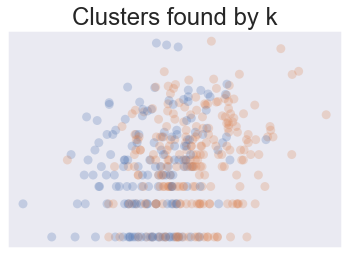

In [15]:
cl.plot_clusters(ovary_gauss, 'k', (), {'n_clusters':2})

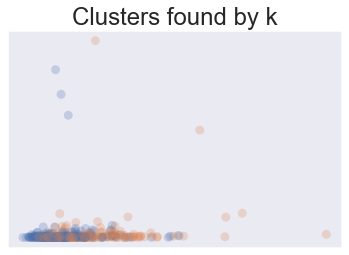

In [16]:
cl.plot_clusters(ovary_z, 'k', (), {'n_clusters':2})

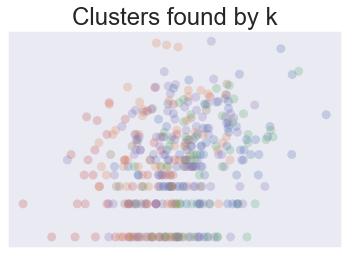

In [17]:
cl.plot_clusters(ovary_gauss, 'k', (), {'n_clusters':6})

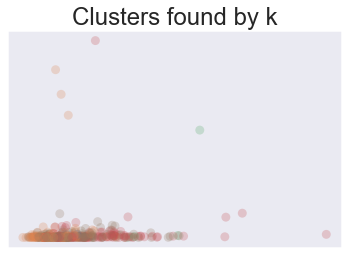

In [18]:
cl.plot_clusters(ovary_z, 'k', (), {'n_clusters':6})

From the above graphs, it's clear that the gaussian standardized data is better suited for clustering. And that two clusters is the best option of kMeans for ovarian cancer.
* So for ovarian cancer, if we're using kMeans clustering, the best approach is to standardize with gaussian and use two clusters. 

Now I'm looking at kMeans clustering for breast cancer data using the same parameters as those I used for ovarian cancer

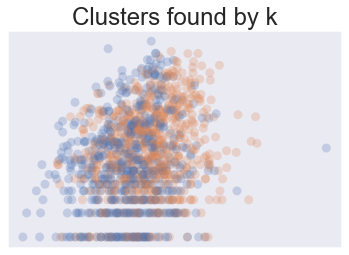

In [19]:
cl.plot_clusters(breast_gauss, 'k', (), {'n_clusters':2})

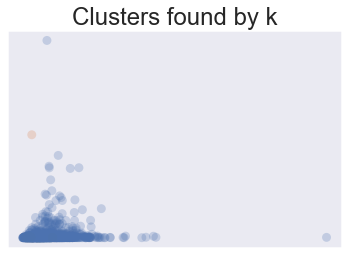

In [20]:
cl.plot_clusters(breast_z, 'k', (), {'n_clusters':2})

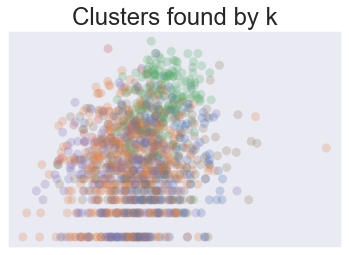

In [21]:
cl.plot_clusters(breast_gauss, 'k', (), {'n_clusters':6})

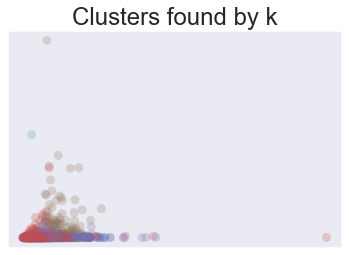

In [22]:
cl.plot_clusters(breast_z, 'k', (), {'n_clusters':6})

As with ovarian cancer, the clustering for breast cancer is best done with two clusters and with the gaussian standardized data, although the visualization does tease out six somewhat independent clusters for the gaussian standardized data.  
* For breast cancer, best kMeans clustering approach is two clusters and using gaussian data. 

Now, I'll deploy a mean shift approach, which calculates the necessary clusters using a bandwidth. 

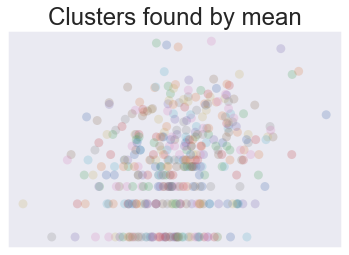

In [23]:
cl.plot_clusters(ovary_gauss, 'mean', (0.25,), {'cluster_all':False})

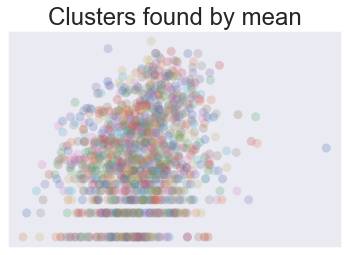

In [24]:
cl.plot_clusters(breast_gauss, 'mean', (0.25,), {'cluster_all':False})

The mean shift clusters do not result in separate clusters. Next, I'll visualize the spectral clustering, which do require determining the appropriate clusters. I'll choose 2, based on the finding of kMeans.

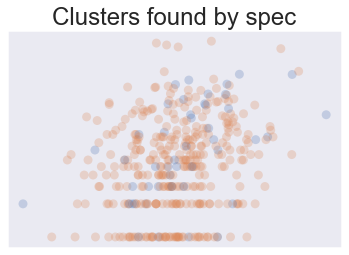

In [25]:
cl.plot_clusters(ovary_gauss, 'spec', (), {'n_clusters':2})

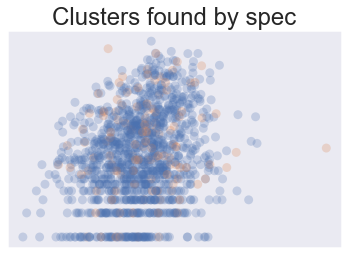

In [26]:
cl.plot_clusters(breast_gauss, 'spec', (), {'n_clusters':2})

It appears that spectral clustering is fairy effective for ovarian cancer data as it classifies most points as one subtype. It's not as effective for breast cancer however. 

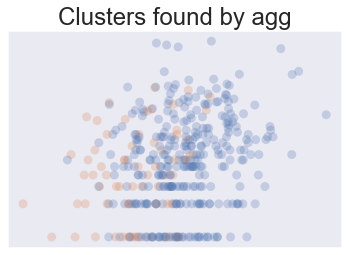

In [27]:
cl.plot_clusters(ovary_gauss, 'agg', (), {'n_clusters':2, 'linkage':'ward'})

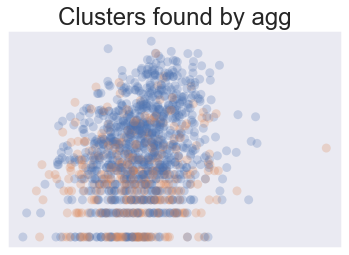

In [28]:
cl.plot_clusters(breast_gauss, 'agg', (), {'n_clusters':2, 'linkage':'ward'})

From the visualizations above, it appears that agglomerative clustering is a decent clustering method for both ovarian and breast cancer data standardized using gaussian methods. 

#### Q4) Differences in breast cancer and ovarian cancer clustering 

Overall, data standardized using Gaussian methods is best suited for the clustering analysis independent of clustering method, and that two clusters is more instructive than 6. However, there are differences in which clustering method appears to capture differences in the data. Agglomerative clustering for ovarian data captures a distinct difference between the two clusters, while kMeans clustering is the most distinctive one for breast cancer data. 

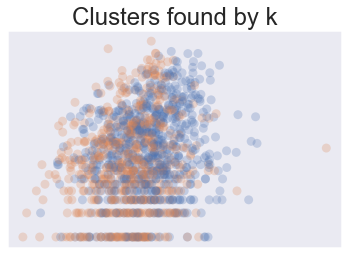

In [29]:
cl.plot_clusters(breast_gauss, 'k', (), {'n_clusters':2})

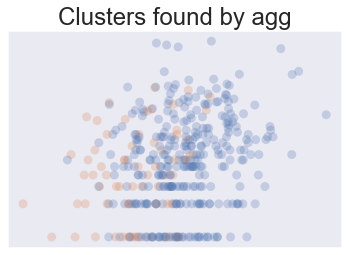

In [30]:
cl.plot_clusters(ovary_gauss, 'agg', (), {'n_clusters':2, 'linkage':'ward'})

#### Q5) Is the clustering valid? 

There are a number of ways for determining the validity of clustering methods. For instance, in the example of ovarian cancer data and using kMeans clustering, an elbow graph shows us the distortion over number of clusters. The point at which the graph bends sharply is a recommended number of clusters. As the graph below shows, two clusters could be optimal for clustering the ovarian data standardized using gaussian methods. In this scenario, it appears the clustering mechanism is valid. 

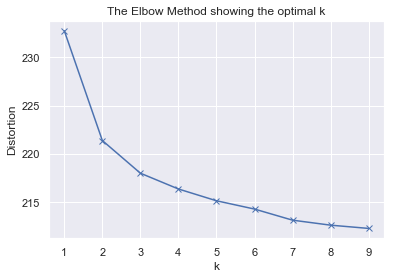

In [ ]:
cl.elbow_graph(ovary_gauss, range(1,10))

#### Q6) Opportunities for improving the clustering 

There are many opportunities to improve this clustering exercise, particularly given that it doesn't output clear clusters. For starters, it might be prudent to conduct the elbow graph test for kMeans clustering prior to making the decision on how many clusters to utilize. What's more, the script I've developed needs to validitiy measures for other clustering algorithms such as spectral clustering in order to determine their validity. Lastly, this exercise could have benefited from a more robust data exploration phase that might have resulted in the selection of a better standardization algorithm. Clearly, many of the algorithms that I used to standardize did not improve clustering, so a more in-depth exploration of the data might have been instructive. 